# Exploración preliminar de datos

In [7]:
# Bibliotecas requeridas
import sys
sys.path.append('../scr/')

import warnings
warnings.filterwarnings('ignore')

import loadAndTransformData as ltd
import viewDataFunctions as vdf


import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
import os
import random

In [8]:
# Carga de datos
data = ltd.combinar_csv_por_prefijo('../data/raw/', 'Minimarket_Sales_Data')

In [9]:
# Descripcion general de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152781 entries, 0 to 152780
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fecha                 152781 non-null  object 
 1   codigo_factura        152781 non-null  int64  
 2   mnt_total_a_pagar     152781 non-null  float64
 3   cant_items            152781 non-null  int64  
 4   familia               152524 non-null  object 
 5   categoria             152781 non-null  object 
 6   subcategoria          152781 non-null  object 
 7   codigo_producto       152781 non-null  float64
 8   cantidad_vendida      152781 non-null  float64
 9   venta_bruta_producto  152781 non-null  float64
 10  venta_neta_producto   152781 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 12.8+ MB


In [4]:
# Cunatas variables numericas y categoricas hay y cuales son
print(f'Hay {len(vdf.cats_y_nums(data)[1])} variables numericas y {len(vdf.cats_y_nums(data)[0])} categoricas')
print(f'Numericas: {vdf.cats_y_nums(data)[1]}\nCategoricas:{vdf.cats_y_nums(data)[0]}')

Hay 7 variables numericas y 4 categoricas
Numericas: ['codigo_factura', 'mnt_total_a_pagar', 'cant_items', 'codigo_producto', 'cantidad_vendida', 'venta_bruta_producto', 'venta_neta_producto']
Categoricas:['fecha', 'familia', 'categoria', 'subcategoria']


In [5]:
# Modificar a tipo object las columnas codigo_factura, codigo_producto
data = ltd.convert_columns_to_category(data, ['codigo_factura', 'codigo_producto', 'familia', 'categoria', 'subcategoria'])
data['fecha'] = pd.to_datetime(data['fecha'])

In [6]:
# Confirmar modificación de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152781 entries, 0 to 152780
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   fecha                 152781 non-null  datetime64[ns]
 1   codigo_factura        152781 non-null  category      
 2   mnt_total_a_pagar     152781 non-null  float64       
 3   cant_items            152781 non-null  int64         
 4   familia               152524 non-null  category      
 5   categoria             152781 non-null  category      
 6   subcategoria          152781 non-null  category      
 7   codigo_producto       152781 non-null  category      
 8   cantidad_vendida      152781 non-null  float64       
 9   venta_bruta_producto  152781 non-null  float64       
 10  venta_neta_producto   152781 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(4), int64(1)
memory usage: 9.8 MB


In [8]:
#Cantidad de columnas y registros del dataset
data.shape

(152781, 11)

In [10]:
# Visuallización del contenido
data.head(5)

,fecha,codigo_factura,mnt_total_a_pagar,cant_items,familia,categoria,subcategoria,codigo_producto,cantidad_vendida,venta_bruta_producto,venta_neta_producto
0,2024-01-01,2347409568,9470.0,5,Refrigerados,Comida Preparada,Ready To Eat,12000395.0,1.0,4390.0,3689.0
1,2024-01-01,2347409568,9470.0,5,Alimentos Dulces,Dulce,Típicos,12000516.0,1.0,1950.0,1950.0
2,2024-01-01,2347409568,9470.0,5,Empaques y Bazar,Otros,Empaques,12000162.0,1.0,190.0,104.0
3,2024-01-01,2347409568,9470.0,5,Alimentos Sal,Pasabocas,Familiar,12003745.0,1.0,1850.0,1762.0
4,2024-01-01,2347409568,9470.0,5,Alimentos Dulces,Dulce,Otros,12005093.0,1.0,1090.0,916.0


In [15]:
tabla_frecuencia_fam = data['familia'].value_counts().reset_index()
tabla_frecuencia_fam.columns = ['Familia', 'Frecuencia']
tabla_frecuencia_fam


,Familia,Frecuencia
0,Aseo,62416
1,Alimentos Sal,20709
2,Bebidas,17320
3,Alimentos Dulces,17184
4,Refrigerados,12247
5,Empaques y Bazar,6121
6,Commodities,5687
7,Congelados,4855
8,Mascotas,3621
9,Farmacia,1353


In [16]:
tabla_frecuencia_c = data['categoria'].value_counts().reset_index()
tabla_frecuencia_c.columns = ['categoria', 'Frecuencia']
tabla_frecuencia_c

,categoria,Frecuencia
0,Aseo Hogar,27125
1,Aseo Personal,24101
2,Lácteos,13237
3,Bebidas Líquidas,7389
4,Dulce,7193
5,Hogar,6359
6,Pasabocas,6255
7,Otros,5628
8,Salsas Y Aderezos,4710
9,Carnes Frías,4677


In [19]:
tabla_frecuencia_s = data['subcategoria'].value_counts().reset_index()
tabla_frecuencia_s.columns = ['subcategoria', 'Frecuencia']
tabla_frecuencia_s

,subcategoria,Frecuencia
0,Tissue,10653
1,Otros,7385
2,Detergentes,6397
3,Empaques,5628
4,Leches Larga Vida,4583
...,...,...
181,Microondas,7
182,Casa,2
183,Bocadillos,2
184,Vacaciones,2


In [11]:
# Estadísticas generales
data.describe().round(2)

,codigo_factura,mnt_total_a_pagar,cant_items,codigo_producto,cantidad_vendida,venta_bruta_producto,venta_neta_producto
count,1.527810e+05,152781.00,152781.00,152781.00,152781.00,152781.00,152781.00
mean,2.435179e+09,54521.61,12.12,11996986.04,1.32,5744.16,5005.62
std,6.539509e+07,66880.94,13.67,123037.75,1.49,5955.15,5225.90
min,2.324741e+09,-196110.00,-35.00,9000002.00,-18.00,-139980.00,-97025.00
25%,2.379013e+09,14990.00,4.00,12000266.00,1.00,2650.00,2269.00
50%,2.434971e+09,32970.00,8.00,12001128.00,1.00,4290.00,3689.00
75%,2.491288e+09,69980.00,16.00,12003733.00,1.00,6780.00,5874.00
max,2.545461e+09,1186350.00,212.00,12006229.00,96.00,349650.00,293824.00


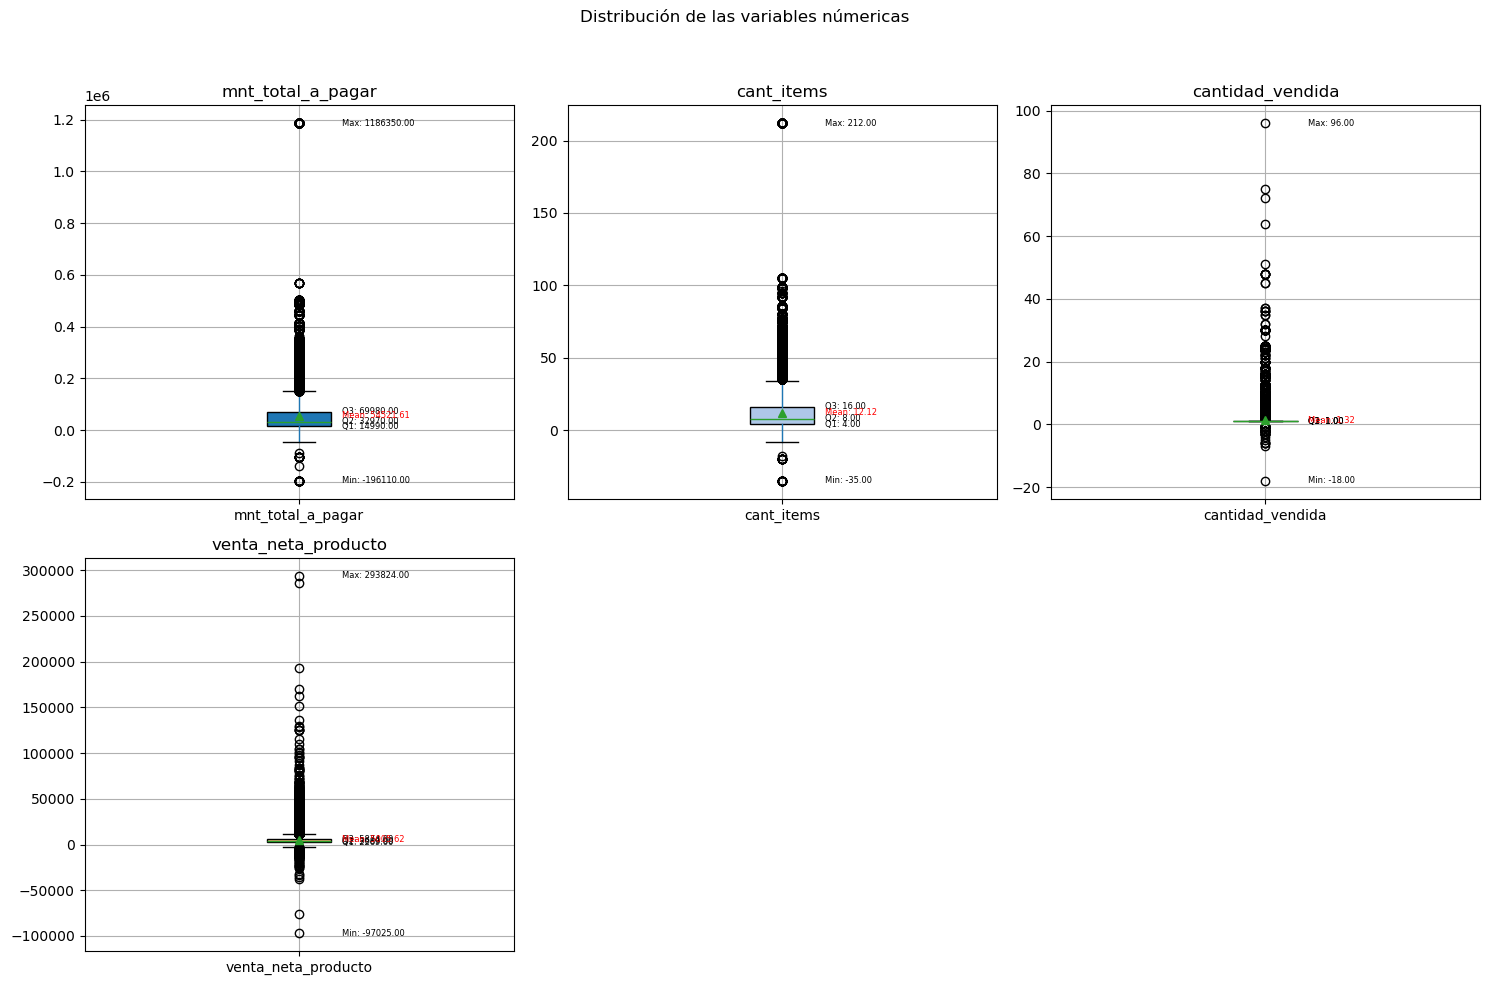

In [11]:
cajas = vdf.graficar_boxplots(data, ['mnt_total_a_pagar', 'cant_items', 'cantidad_vendida', 'venta_neta_producto'], titulo='Distribución de las variables númericas')

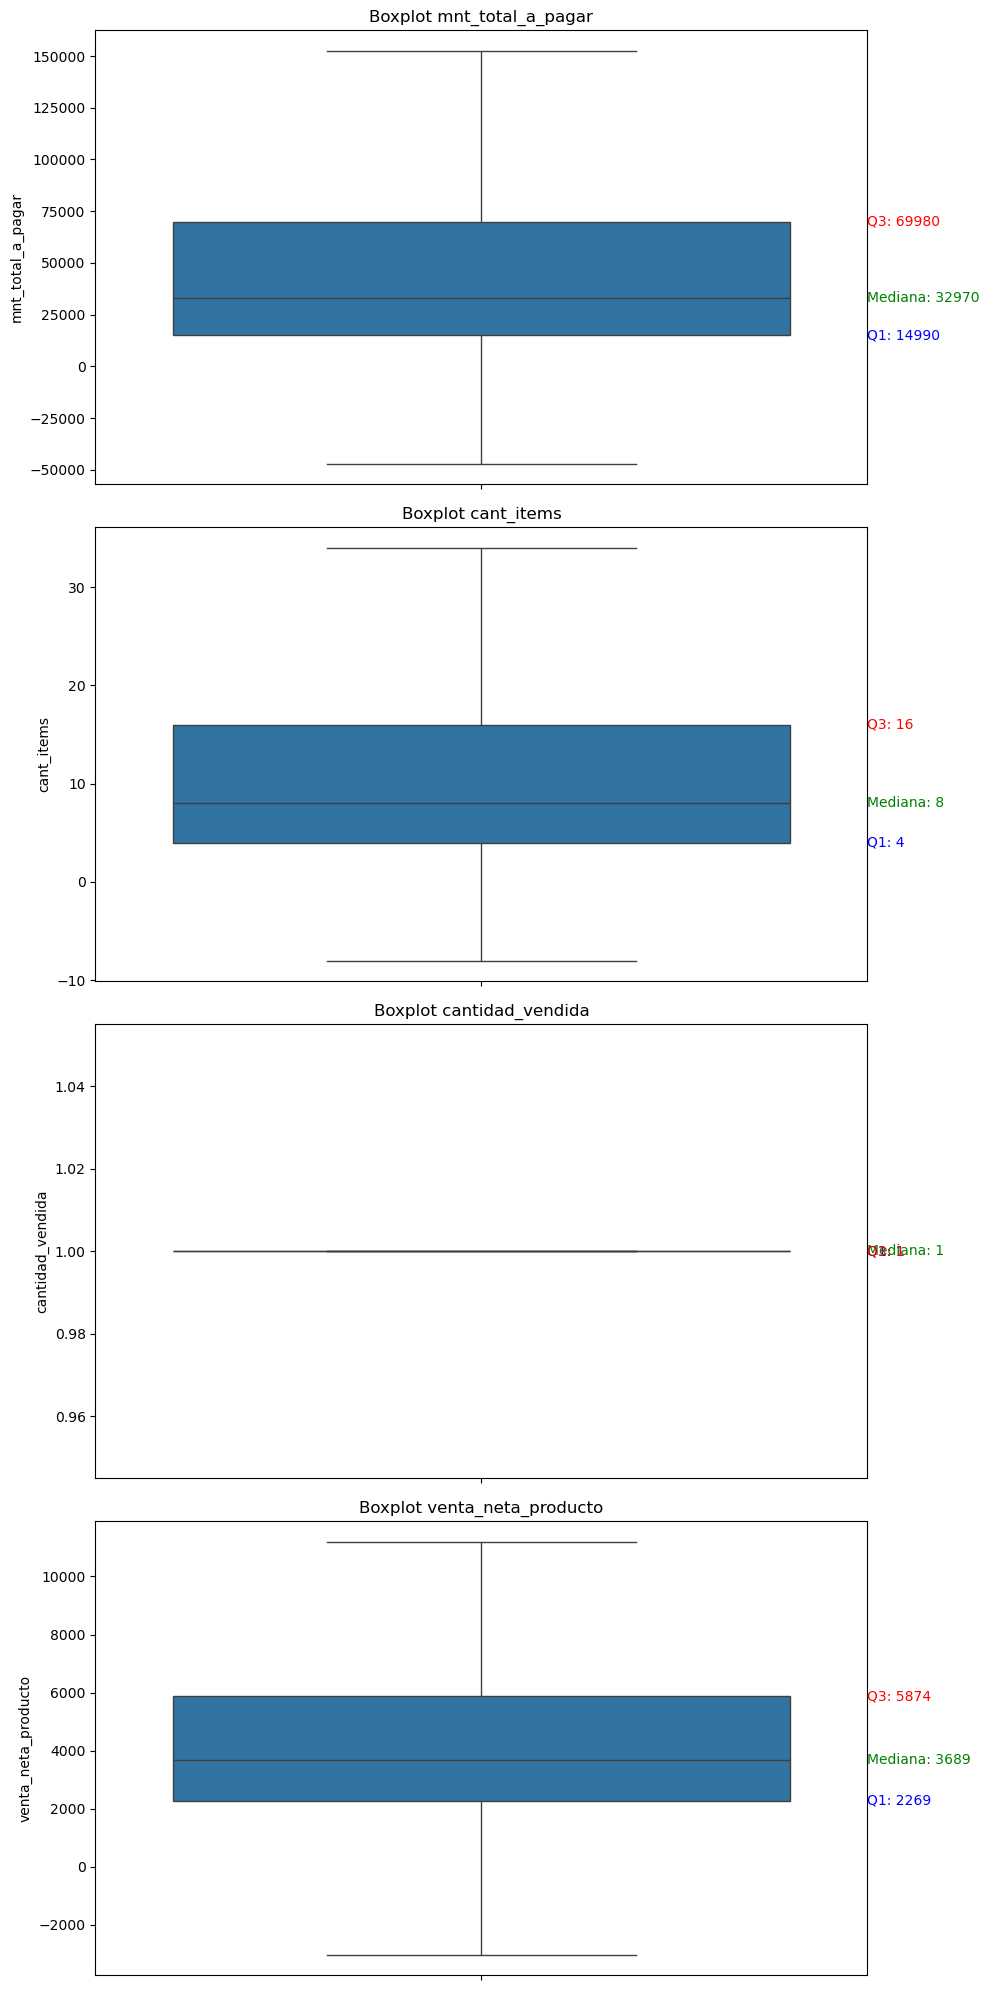

In [12]:
vdf.uni_boxplot(data,['mnt_total_a_pagar', 'cant_items', 'cantidad_vendida', 'venta_neta_producto'],c=1,cs=10,rs=5)

Histogramas de las variables numericas del dataset:


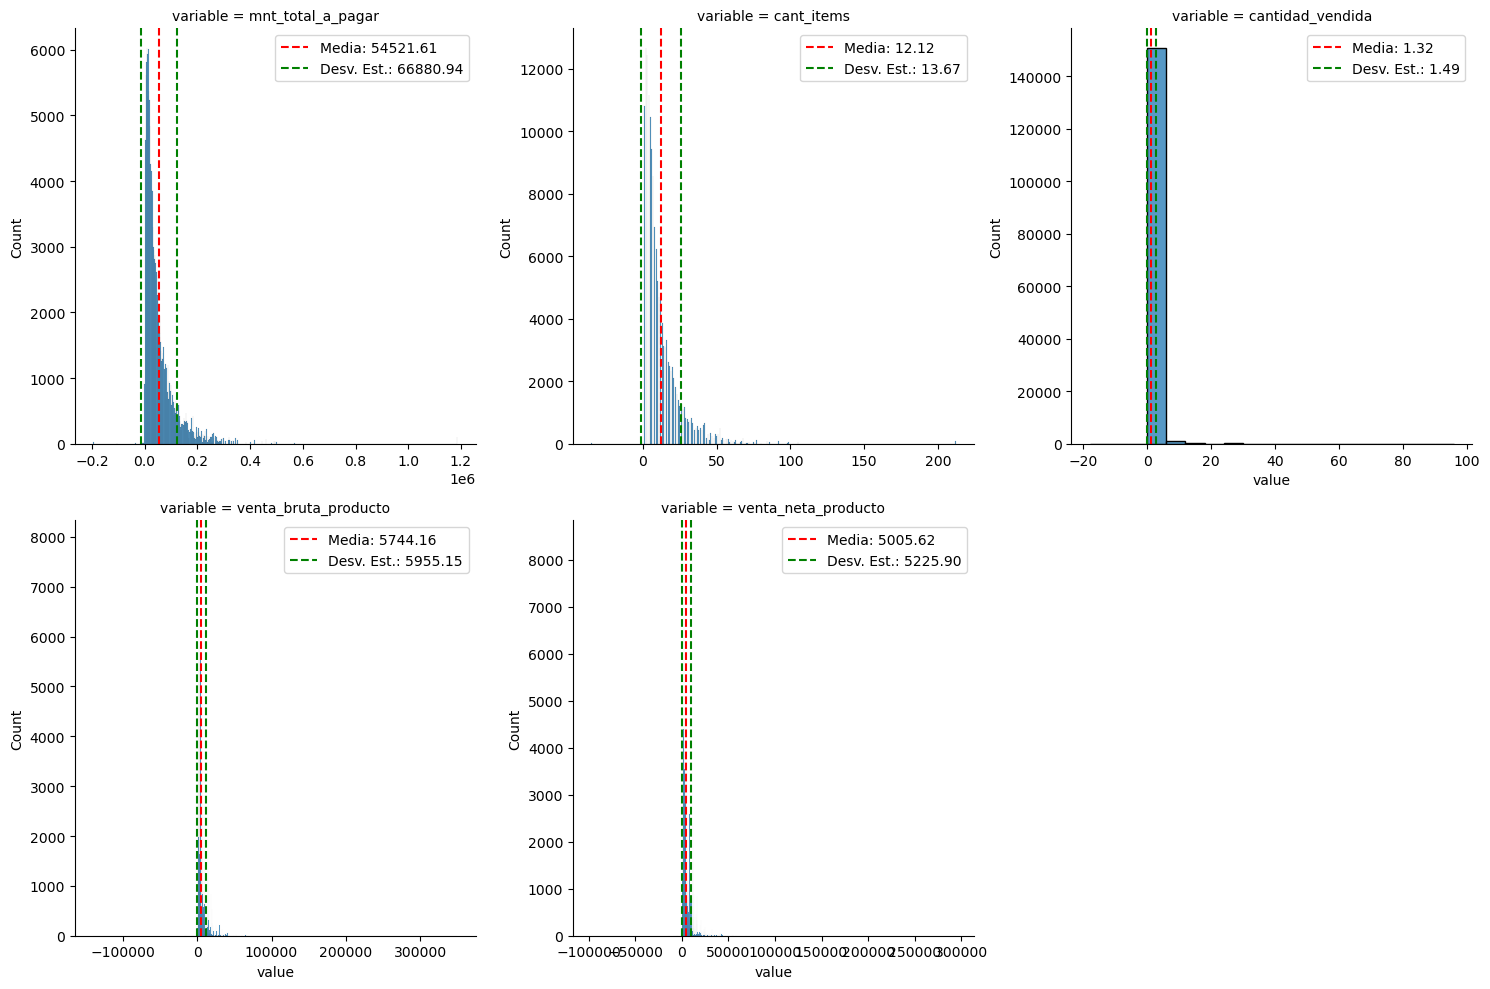

In [13]:
#Histogramas de las variables numericas
vdf.histog_mean_desv(data,3)

<Axes: >

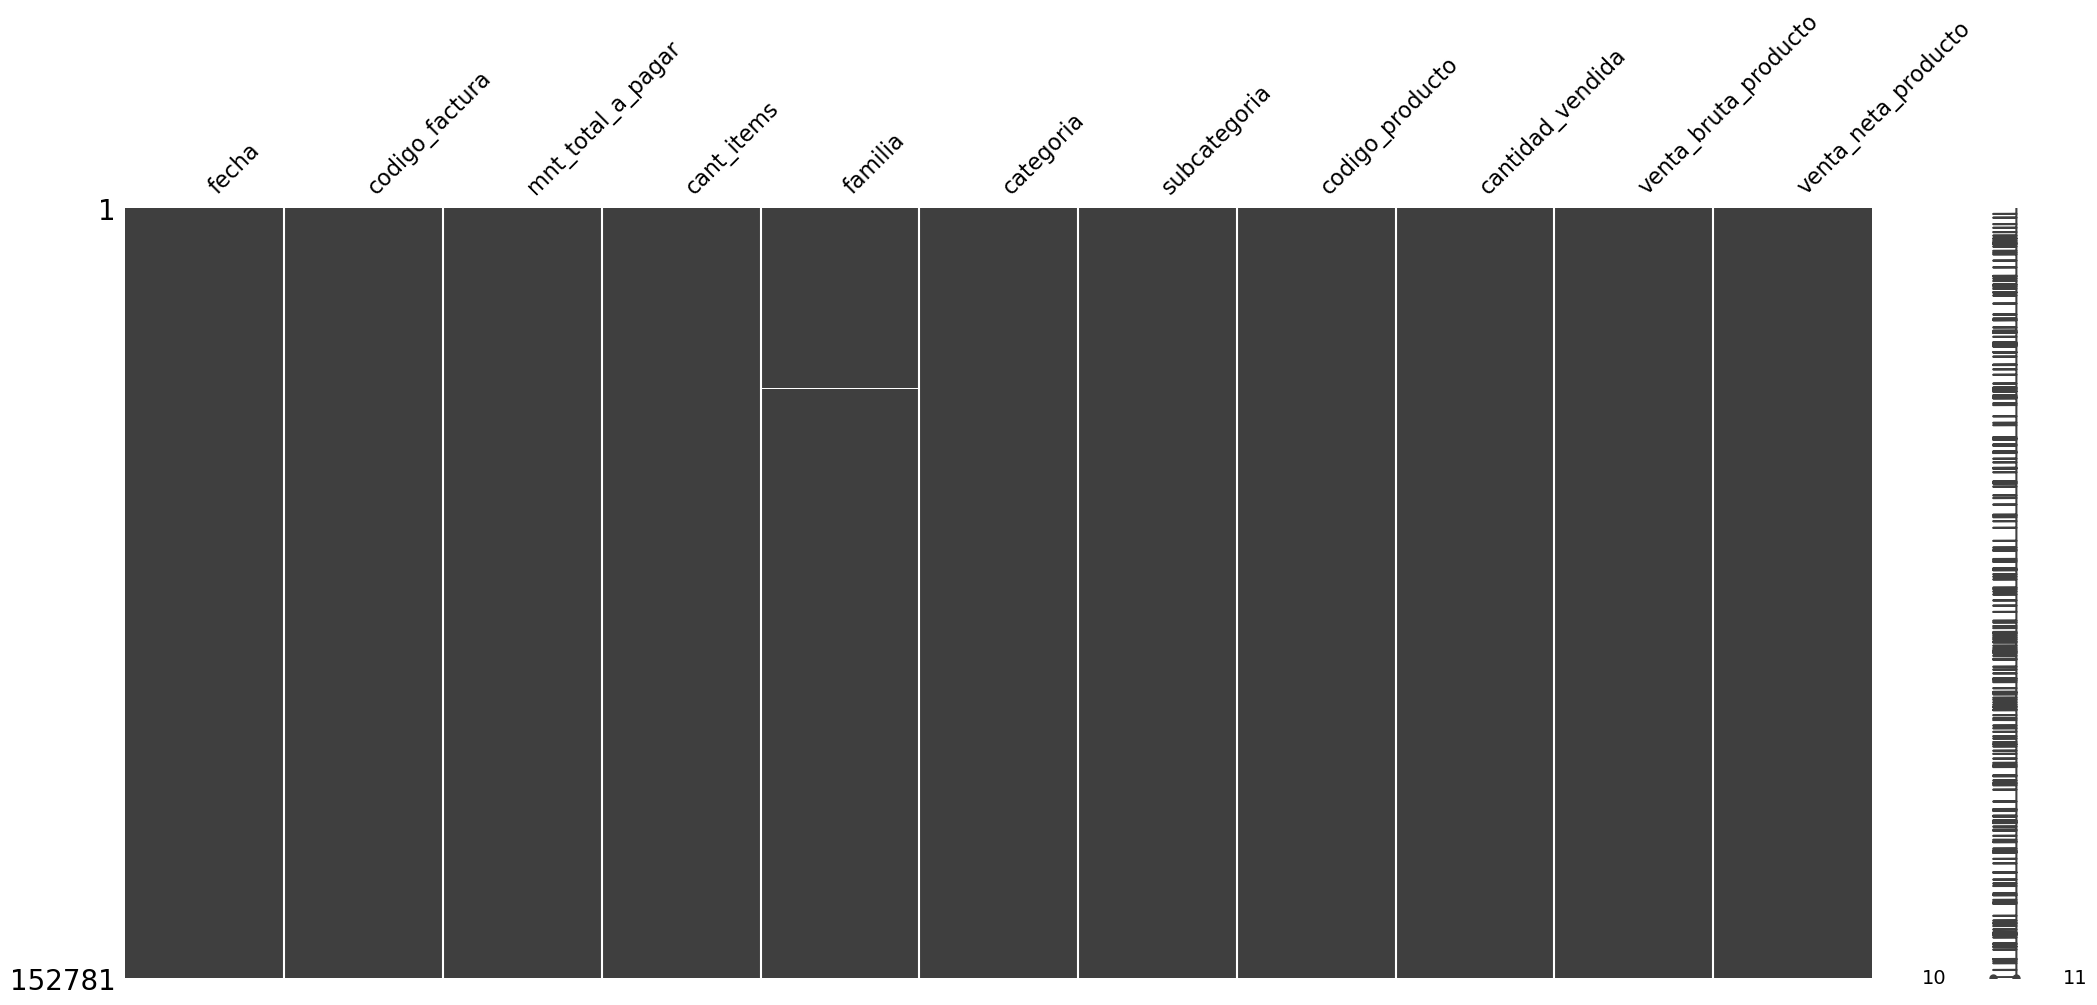

In [14]:
# Analisis Faltantes
msno.matrix(data)

<Axes: >

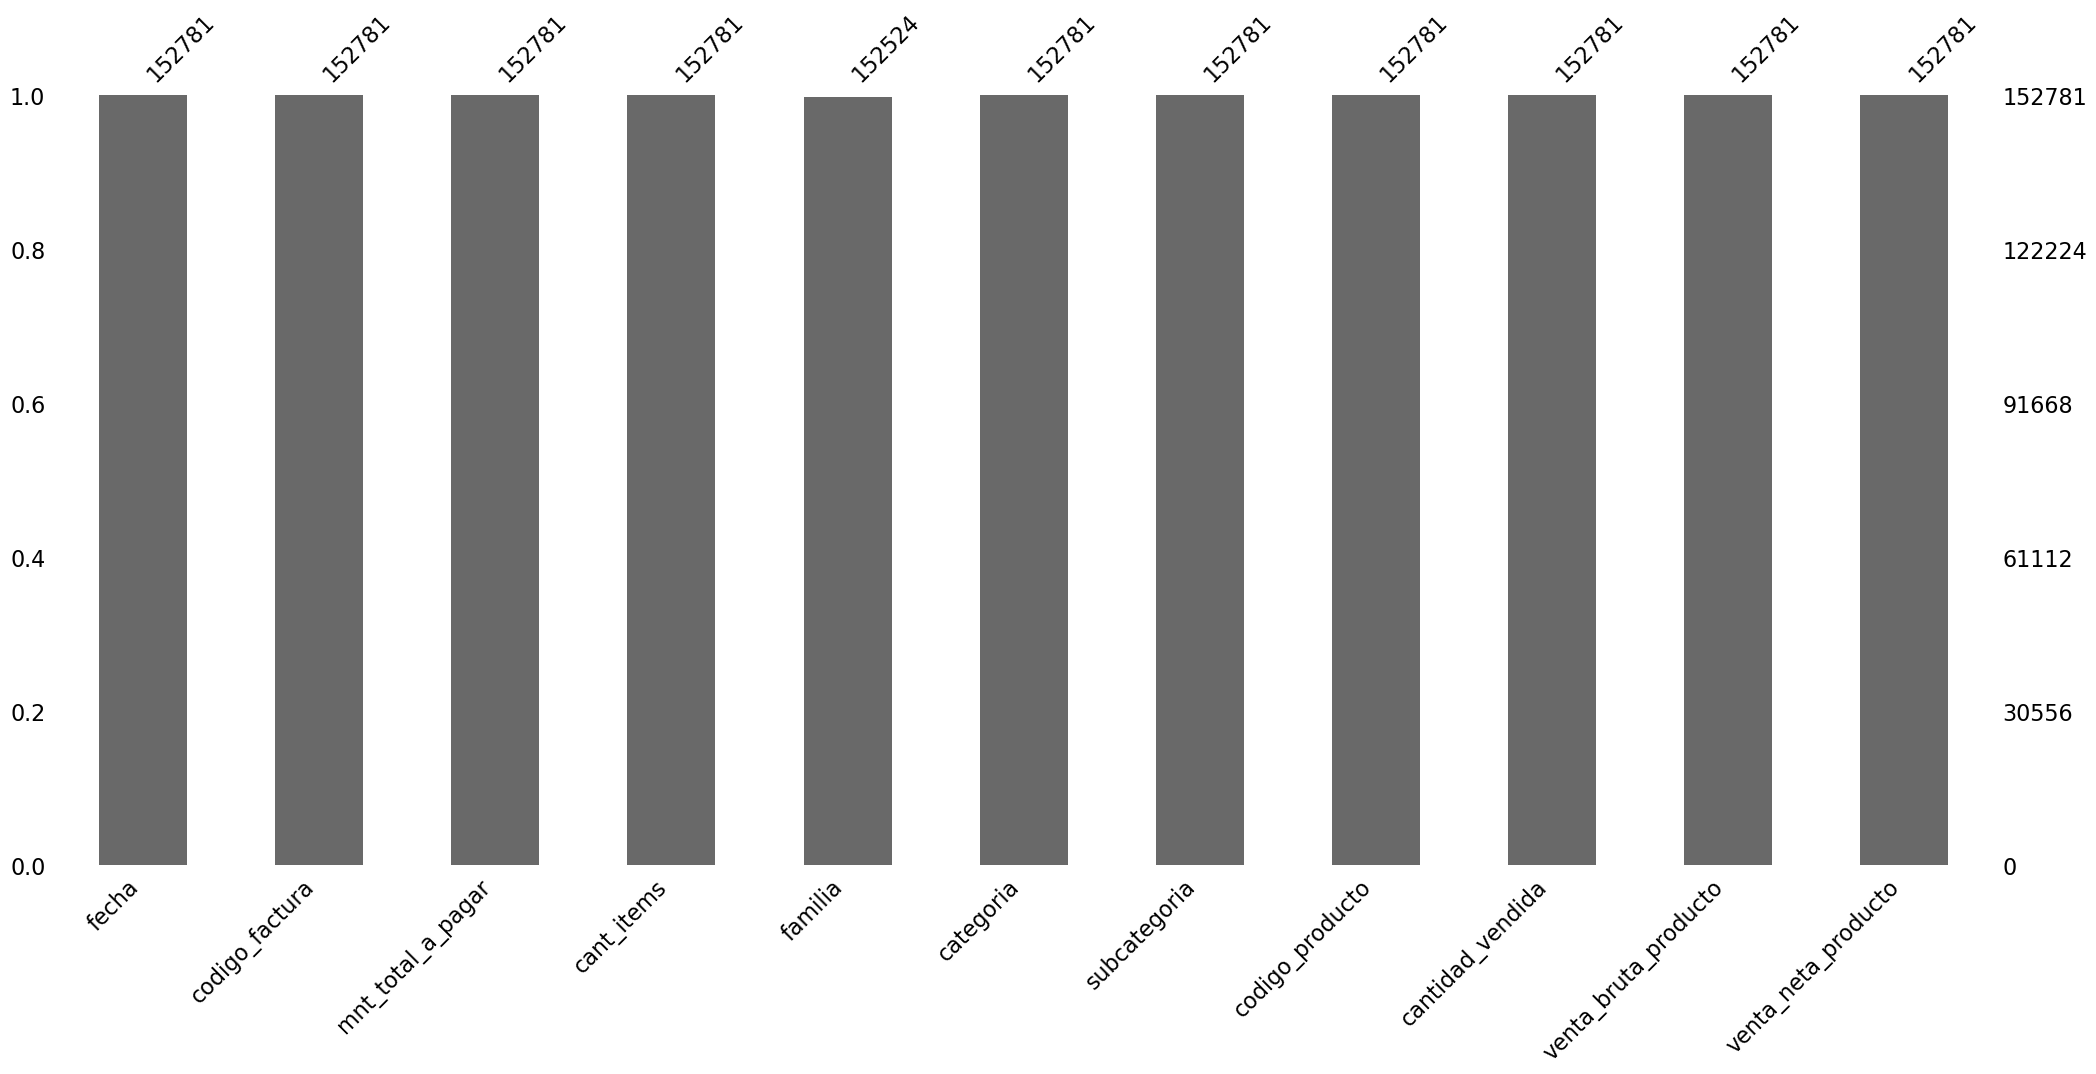

In [15]:
msno.bar(data)

In [16]:
vdf.cantidades_faltantes(data)

Cantidades faltantes del dataset:
fecha                     0
codigo_factura            0
mnt_total_a_pagar         0
cant_items                0
familia                 257
categoria                 0
subcategoria              0
codigo_producto           0
cantidad_vendida          0
venta_bruta_producto      0
venta_neta_producto       0
dtype: int64
% Faltantes del dataset:
fecha                   0.000000
codigo_factura          0.000000
mnt_total_a_pagar       0.000000
cant_items              0.000000
familia                 0.168215
categoria               0.000000
subcategoria            0.000000
codigo_producto         0.000000
cantidad_vendida        0.000000
venta_bruta_producto    0.000000
venta_neta_producto     0.000000
dtype: float64


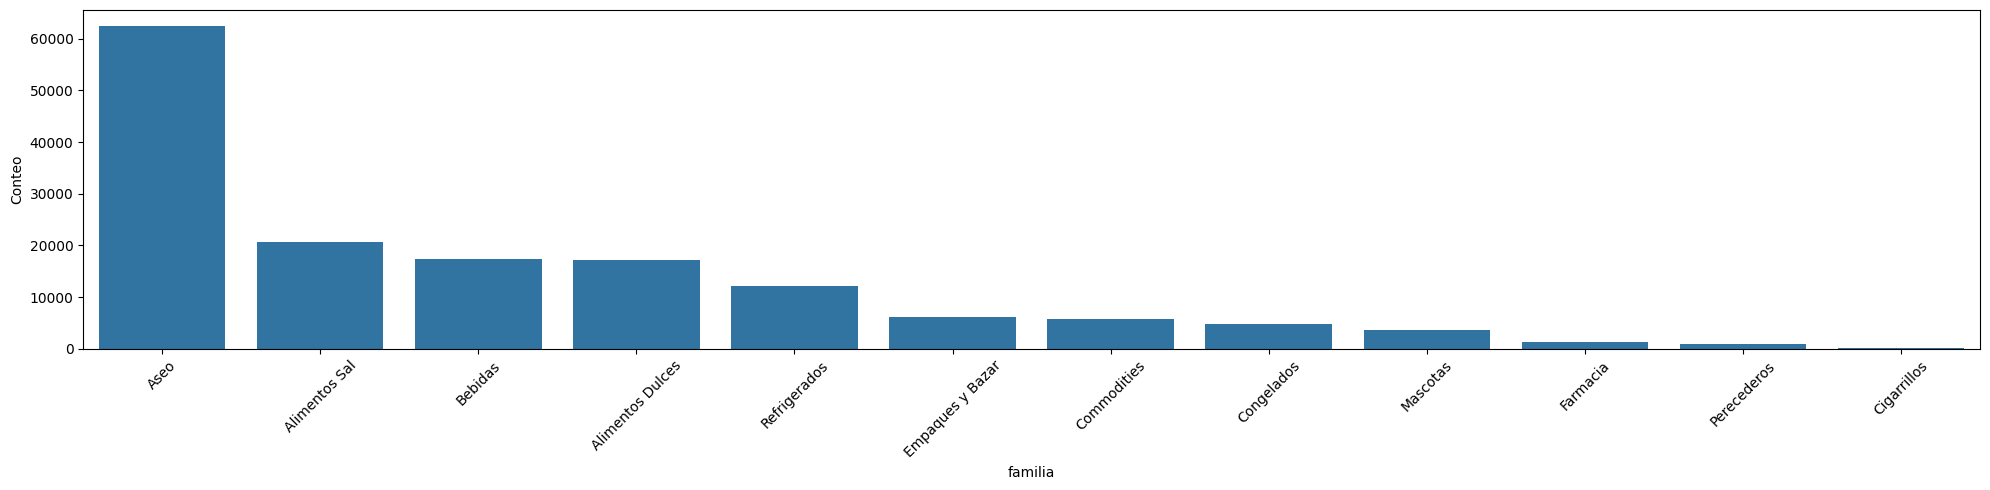

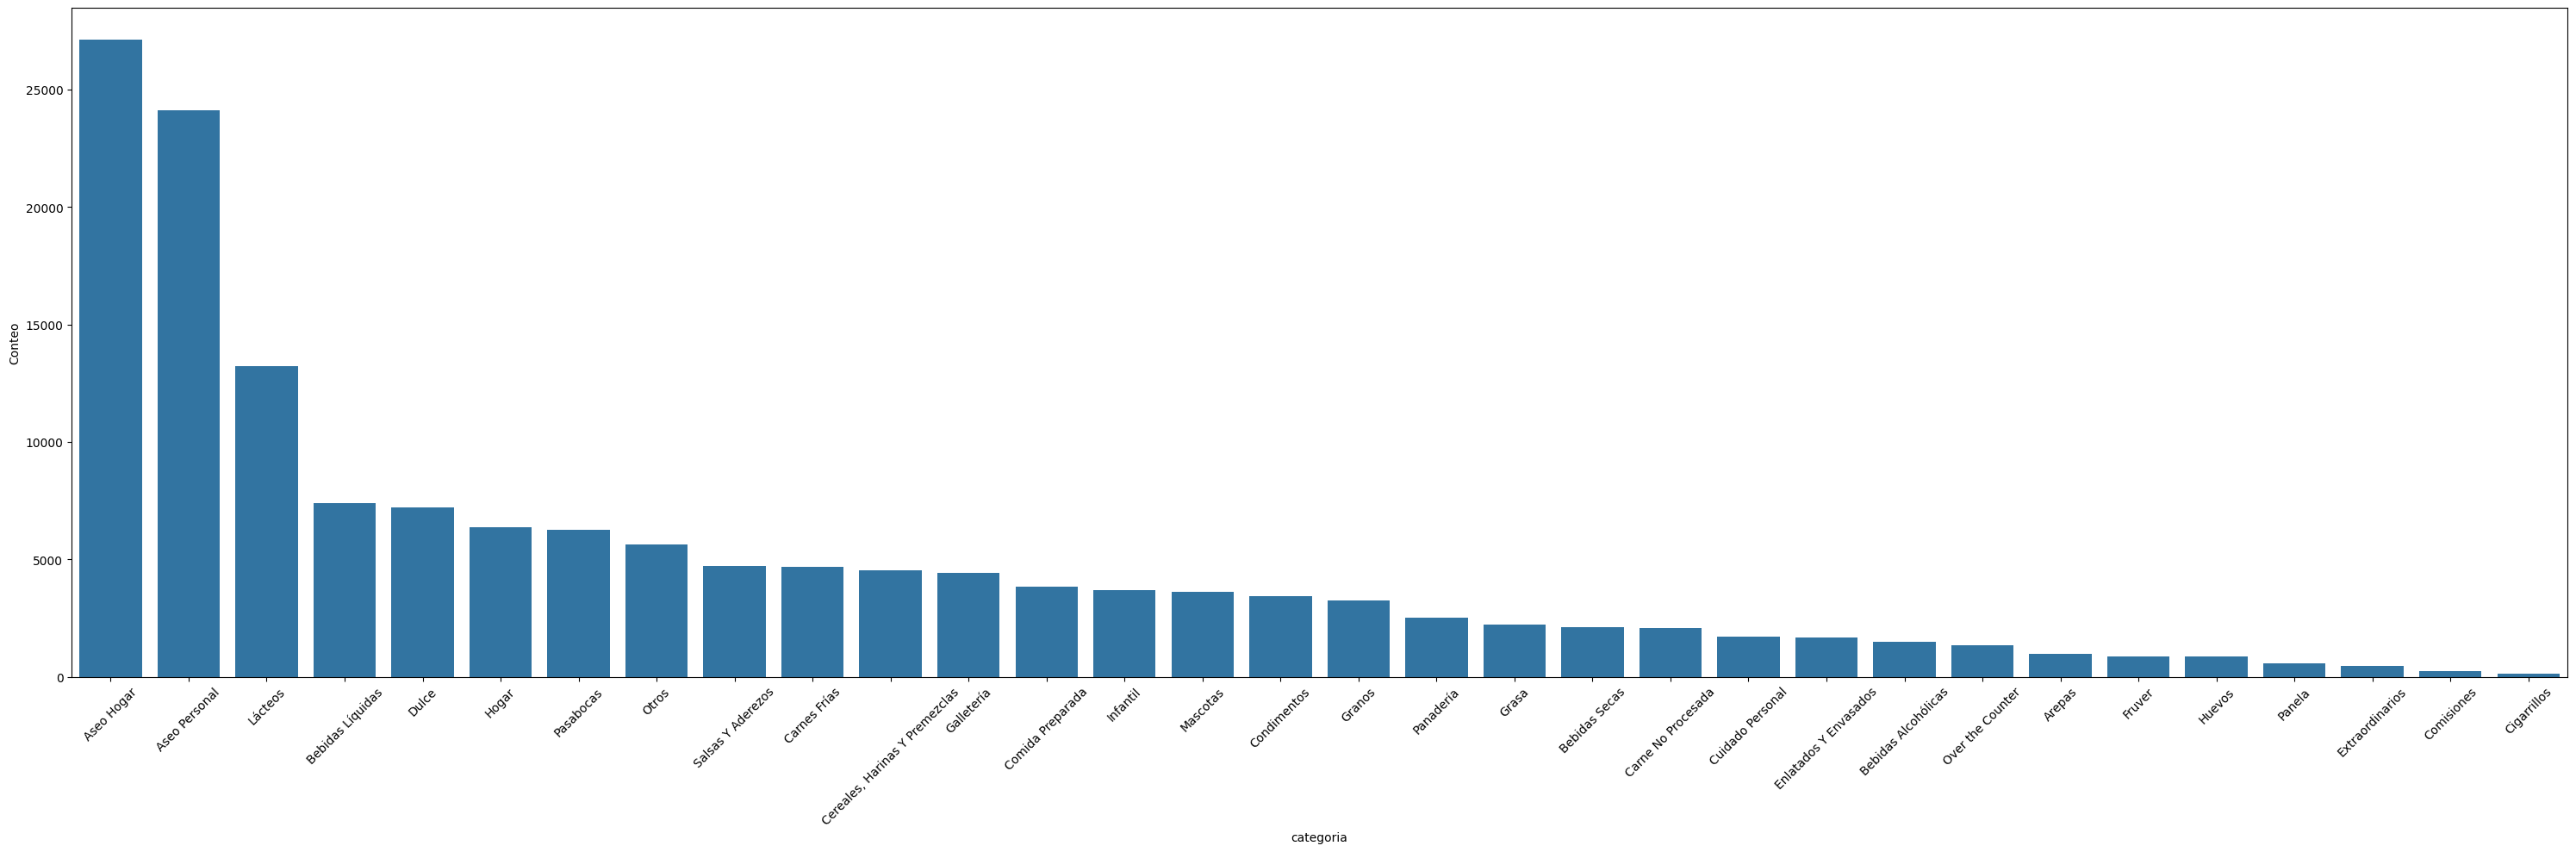

In [17]:
vdf.histog_categoricos(data['familia'],1,20,5)
vdf.histog_categoricos(data['categoria'],1,30,10)



In [19]:
#fig = vdf.estadisticas_graficoBarras(data, 'familia')

In [21]:
#fig = vdf.estadisticas_graficoBarras(data, 'categoria')

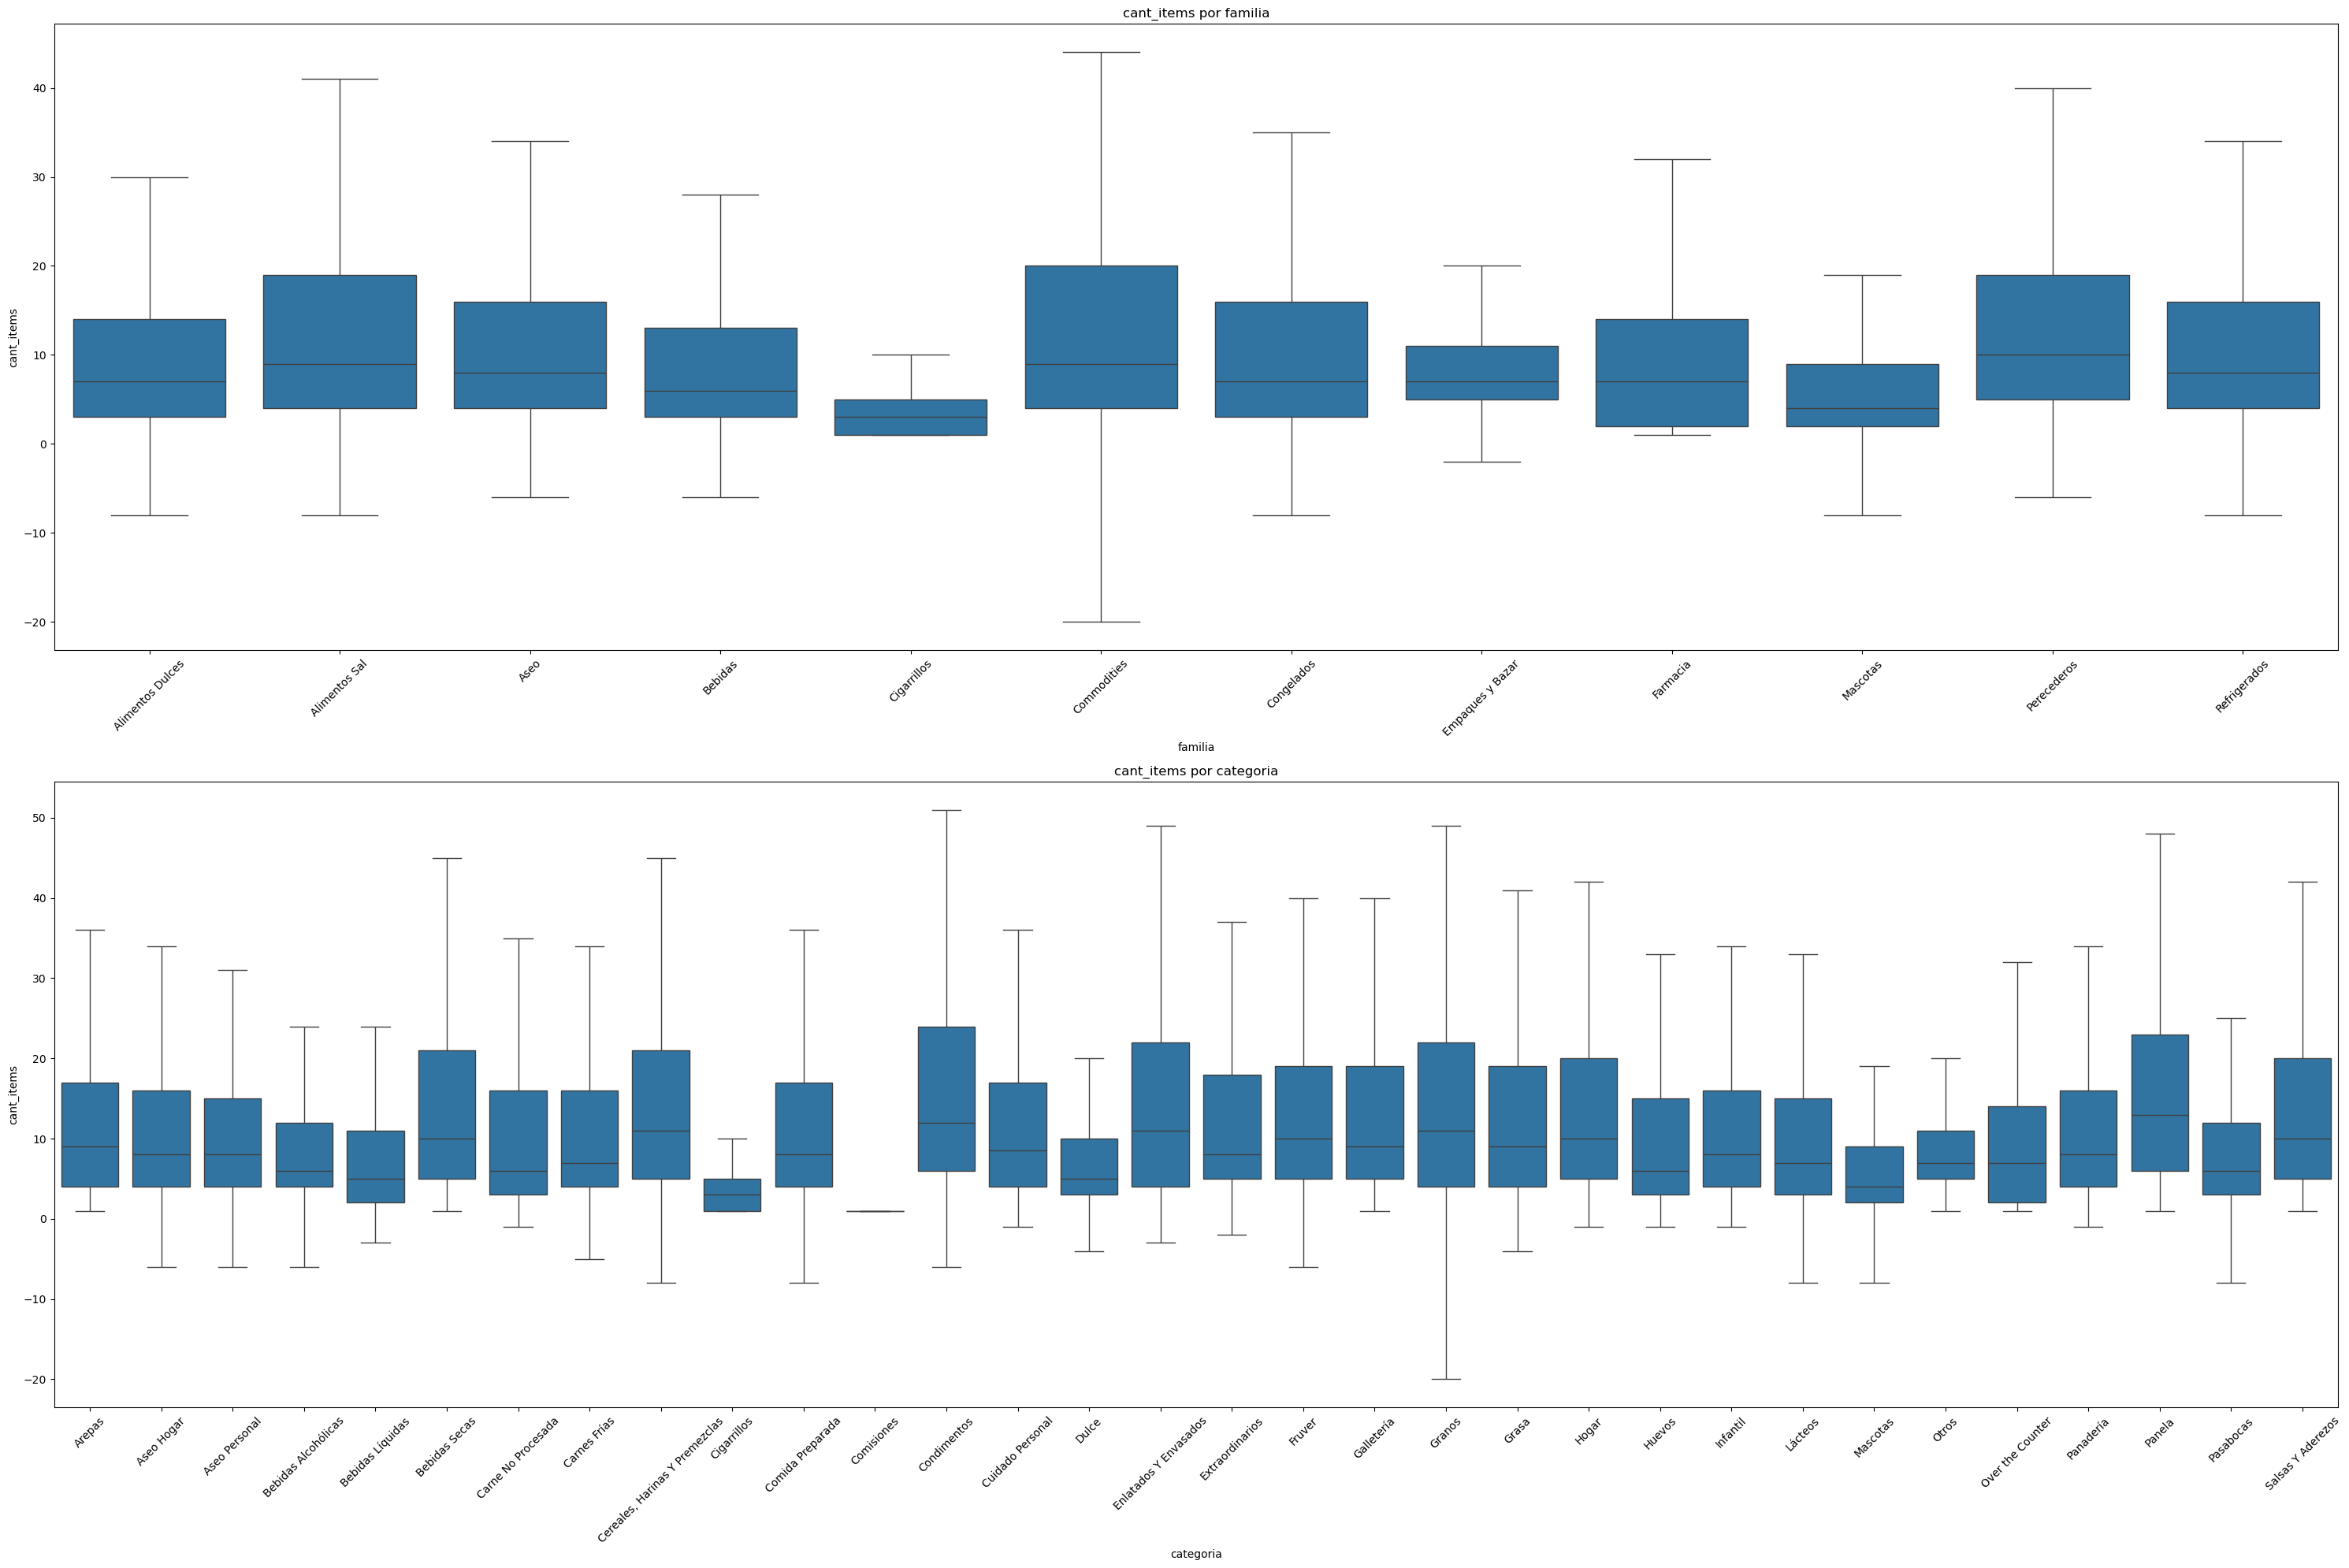

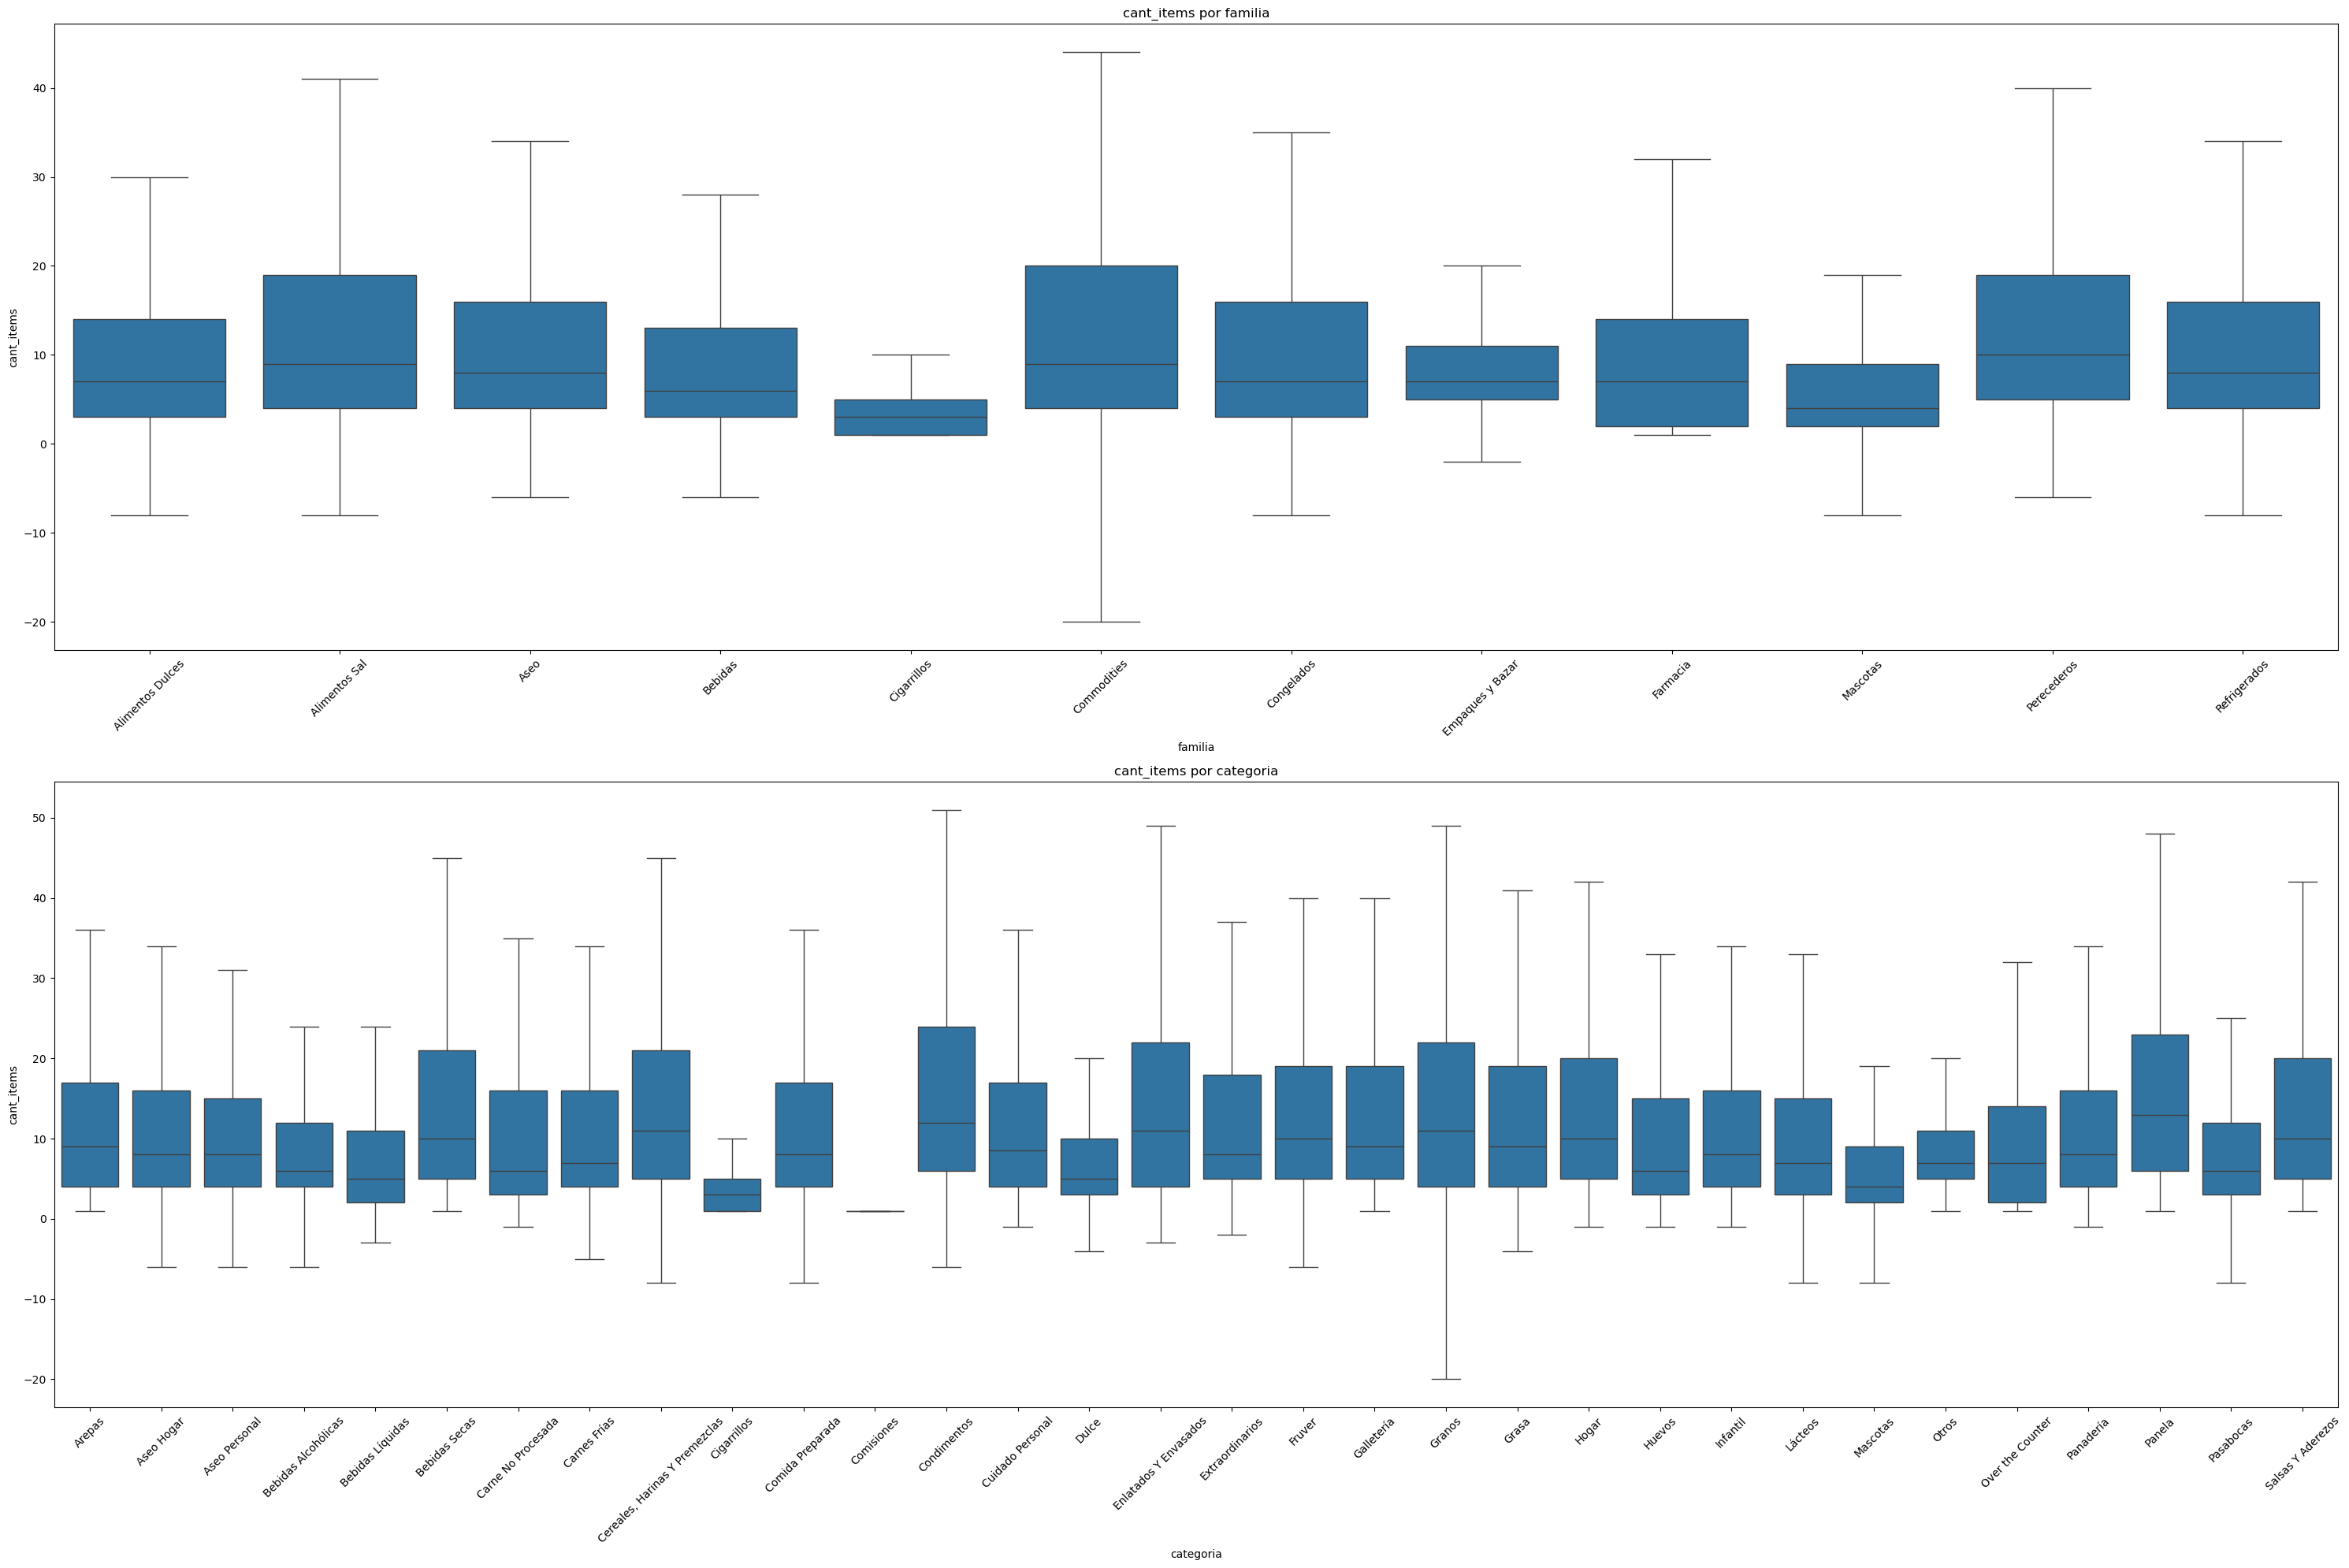

In [18]:
vdf.box_grouped(data,'cant_items',['familia','categoria'],c=1,cs=30,rs=10)

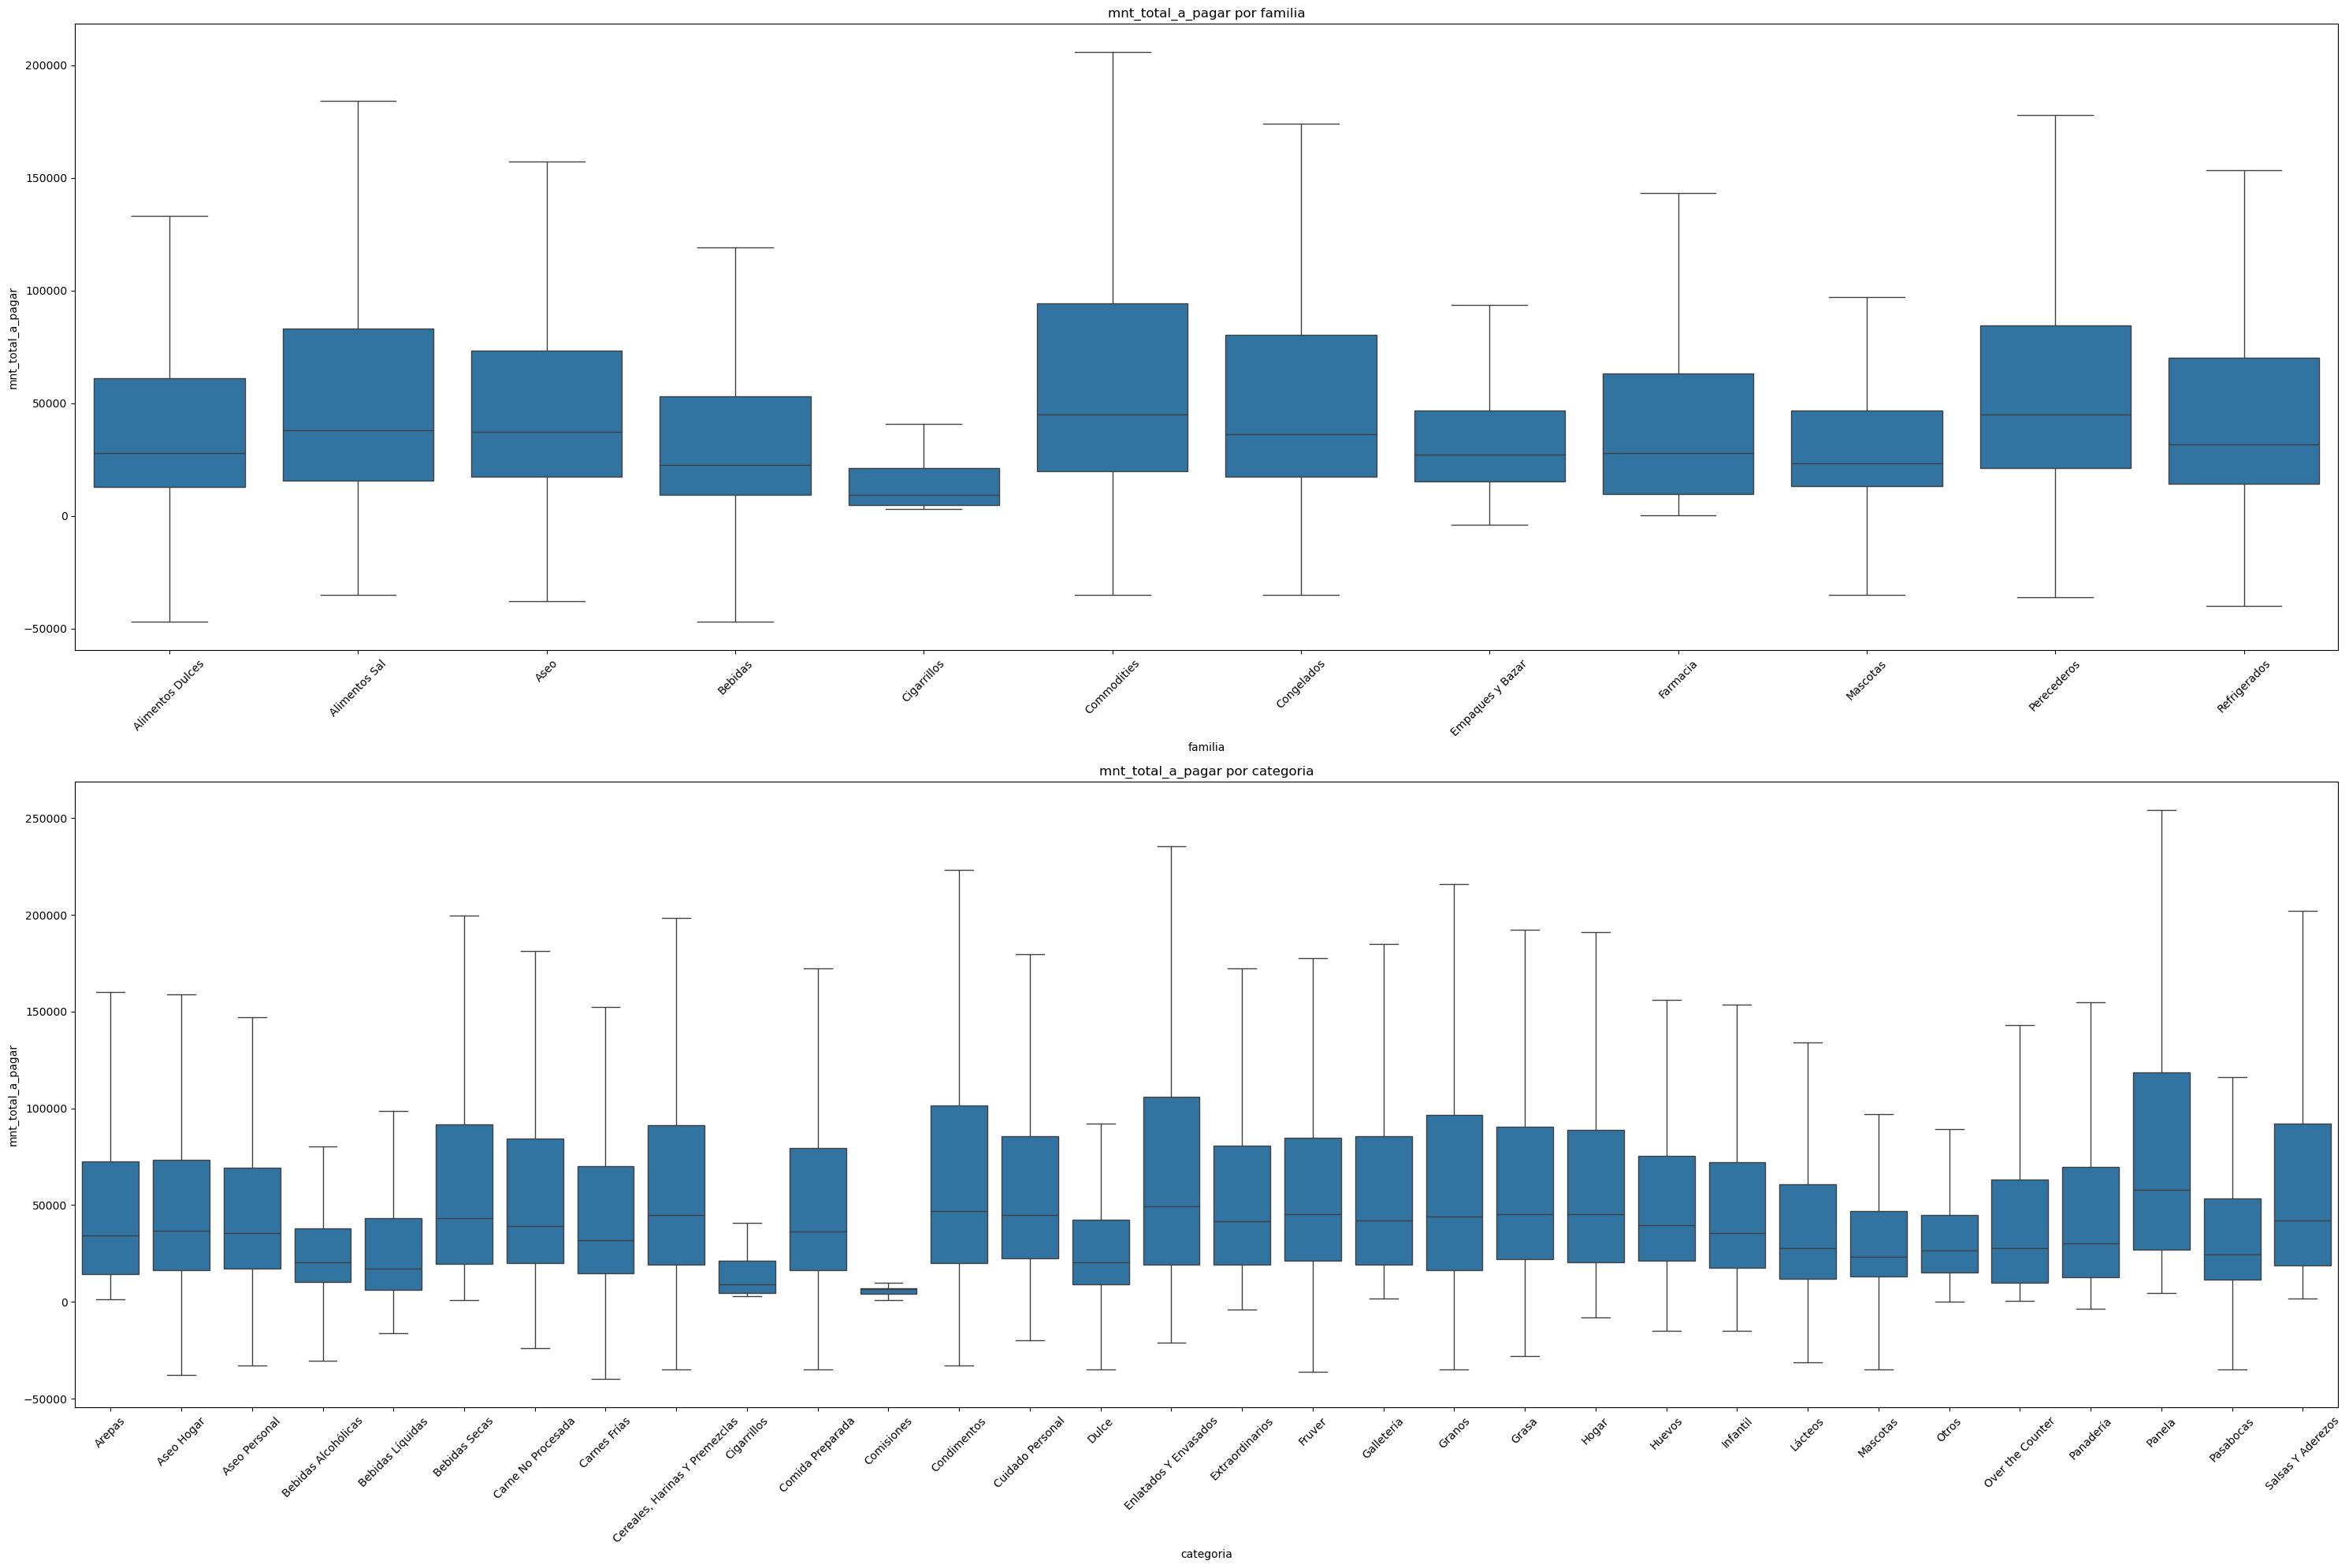

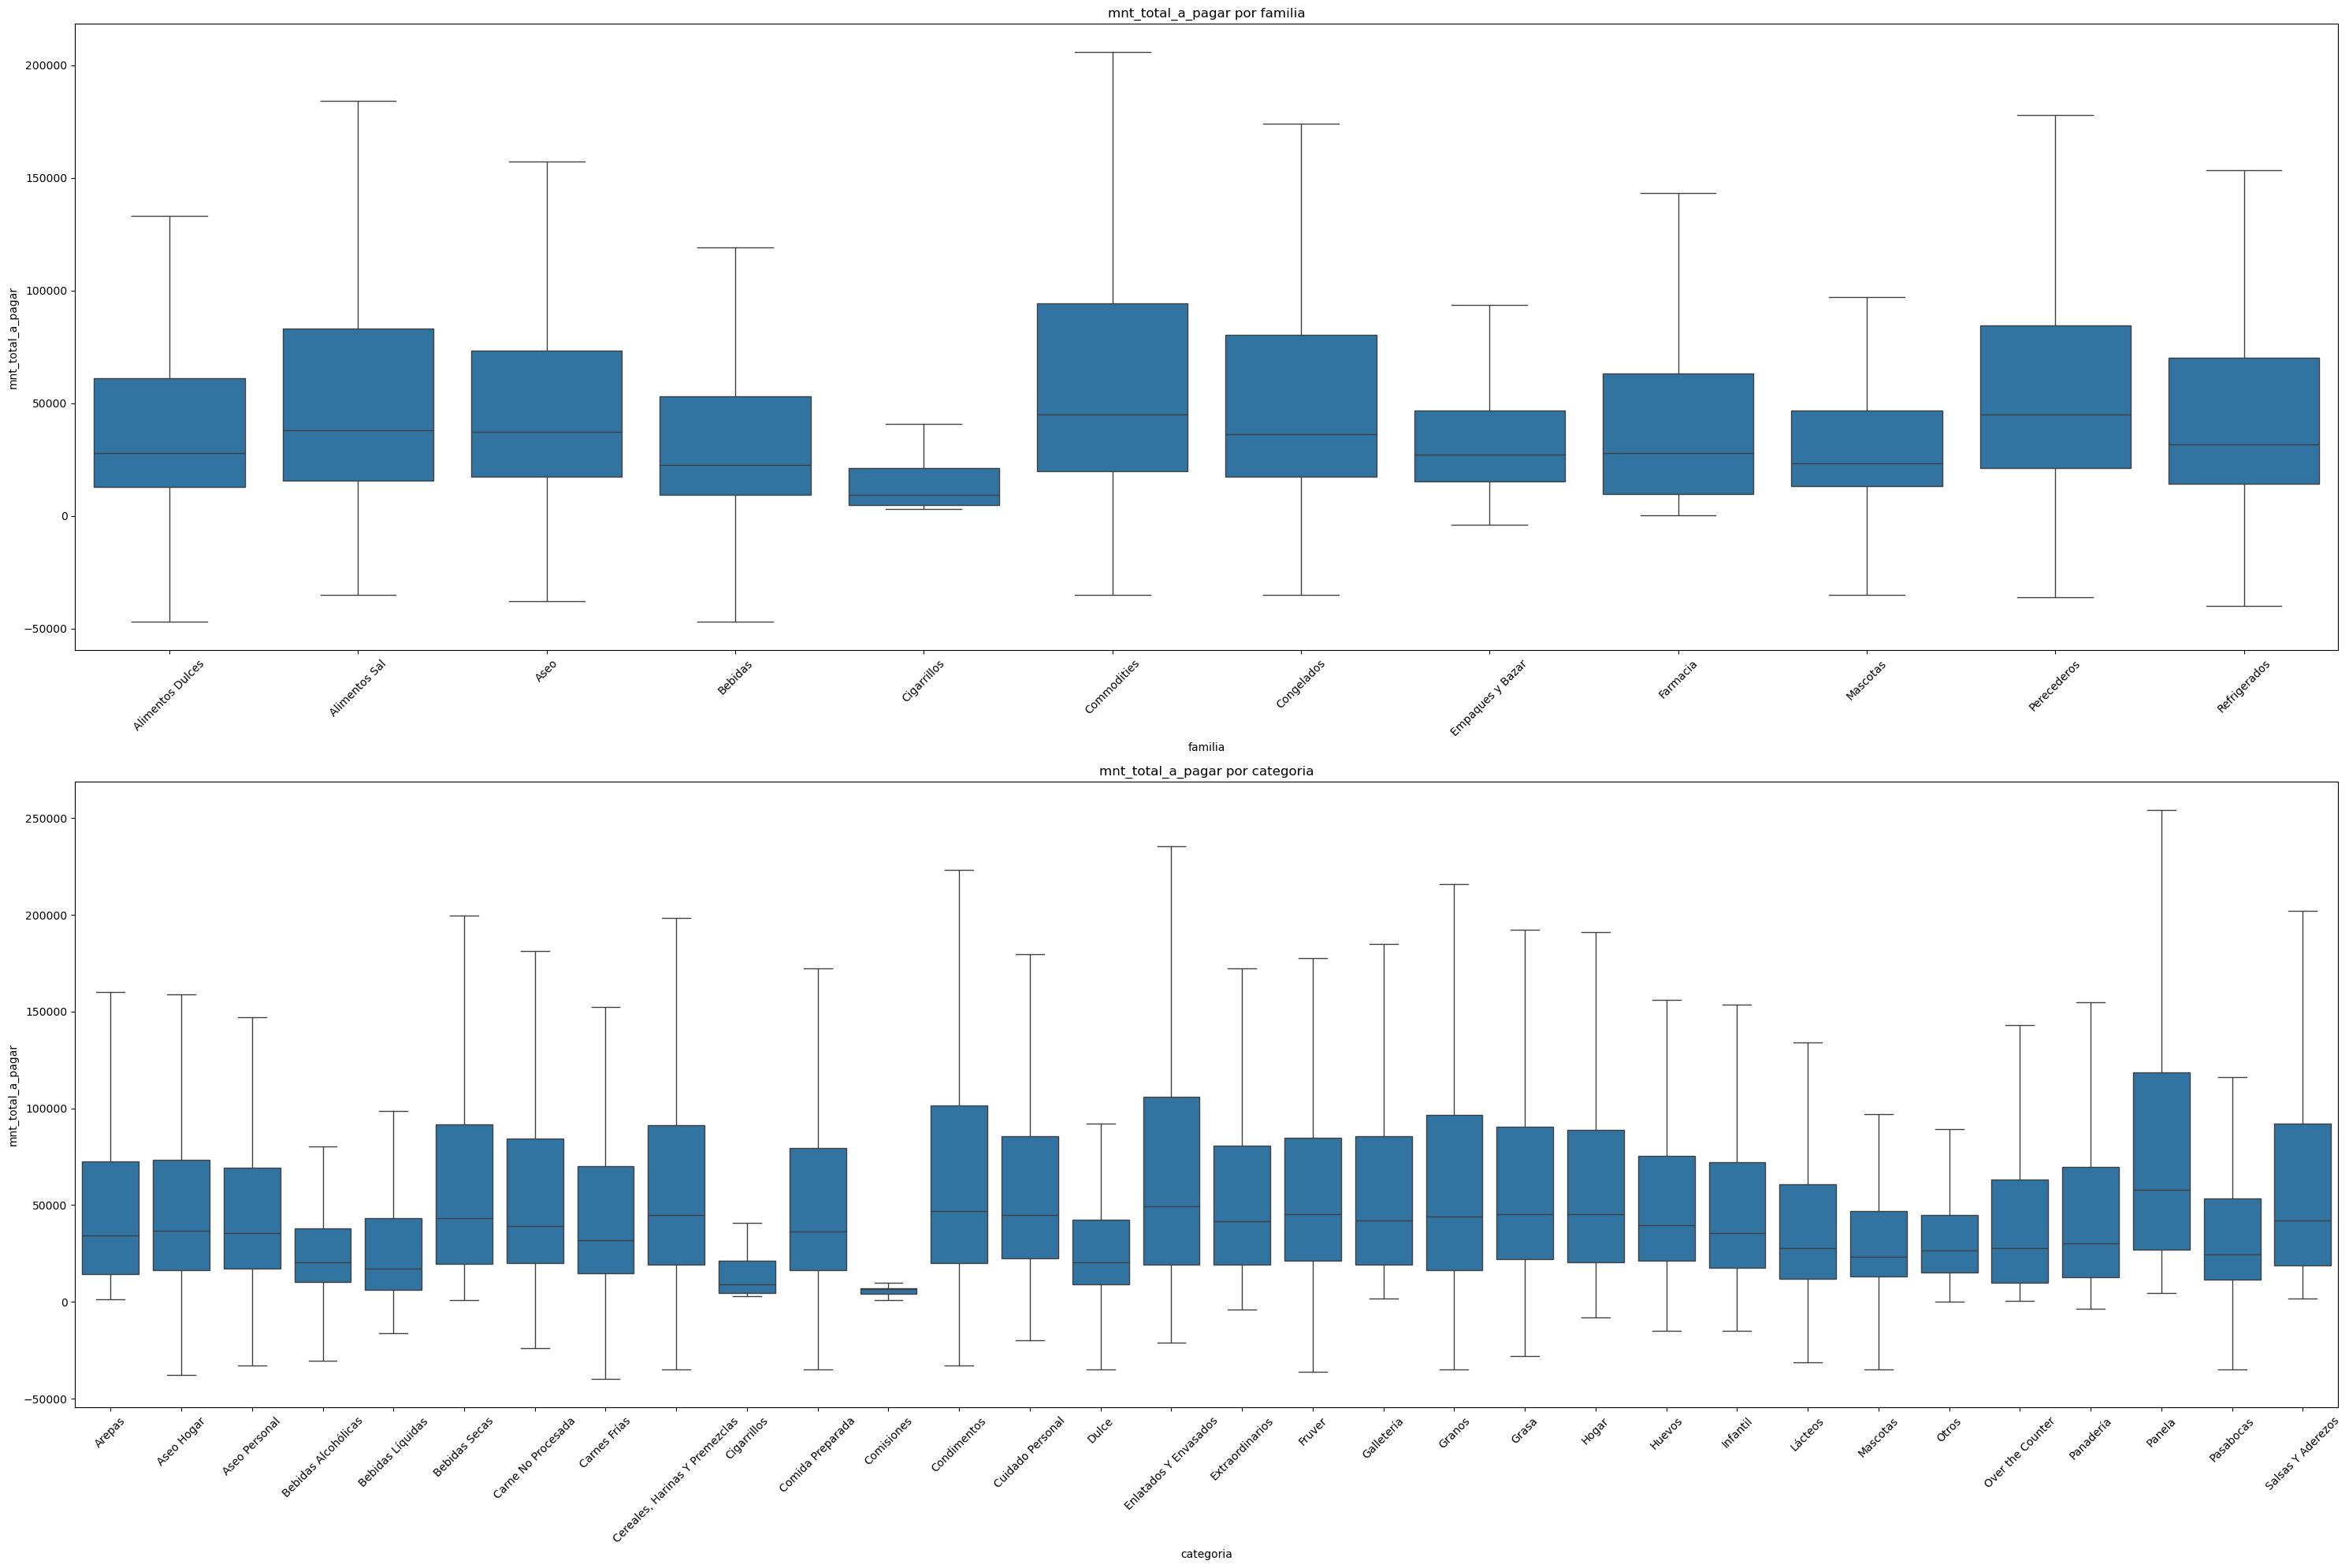

In [19]:
vdf.box_grouped(data,'mnt_total_a_pagar',['familia','categoria'],c=1,cs=30,rs=10)

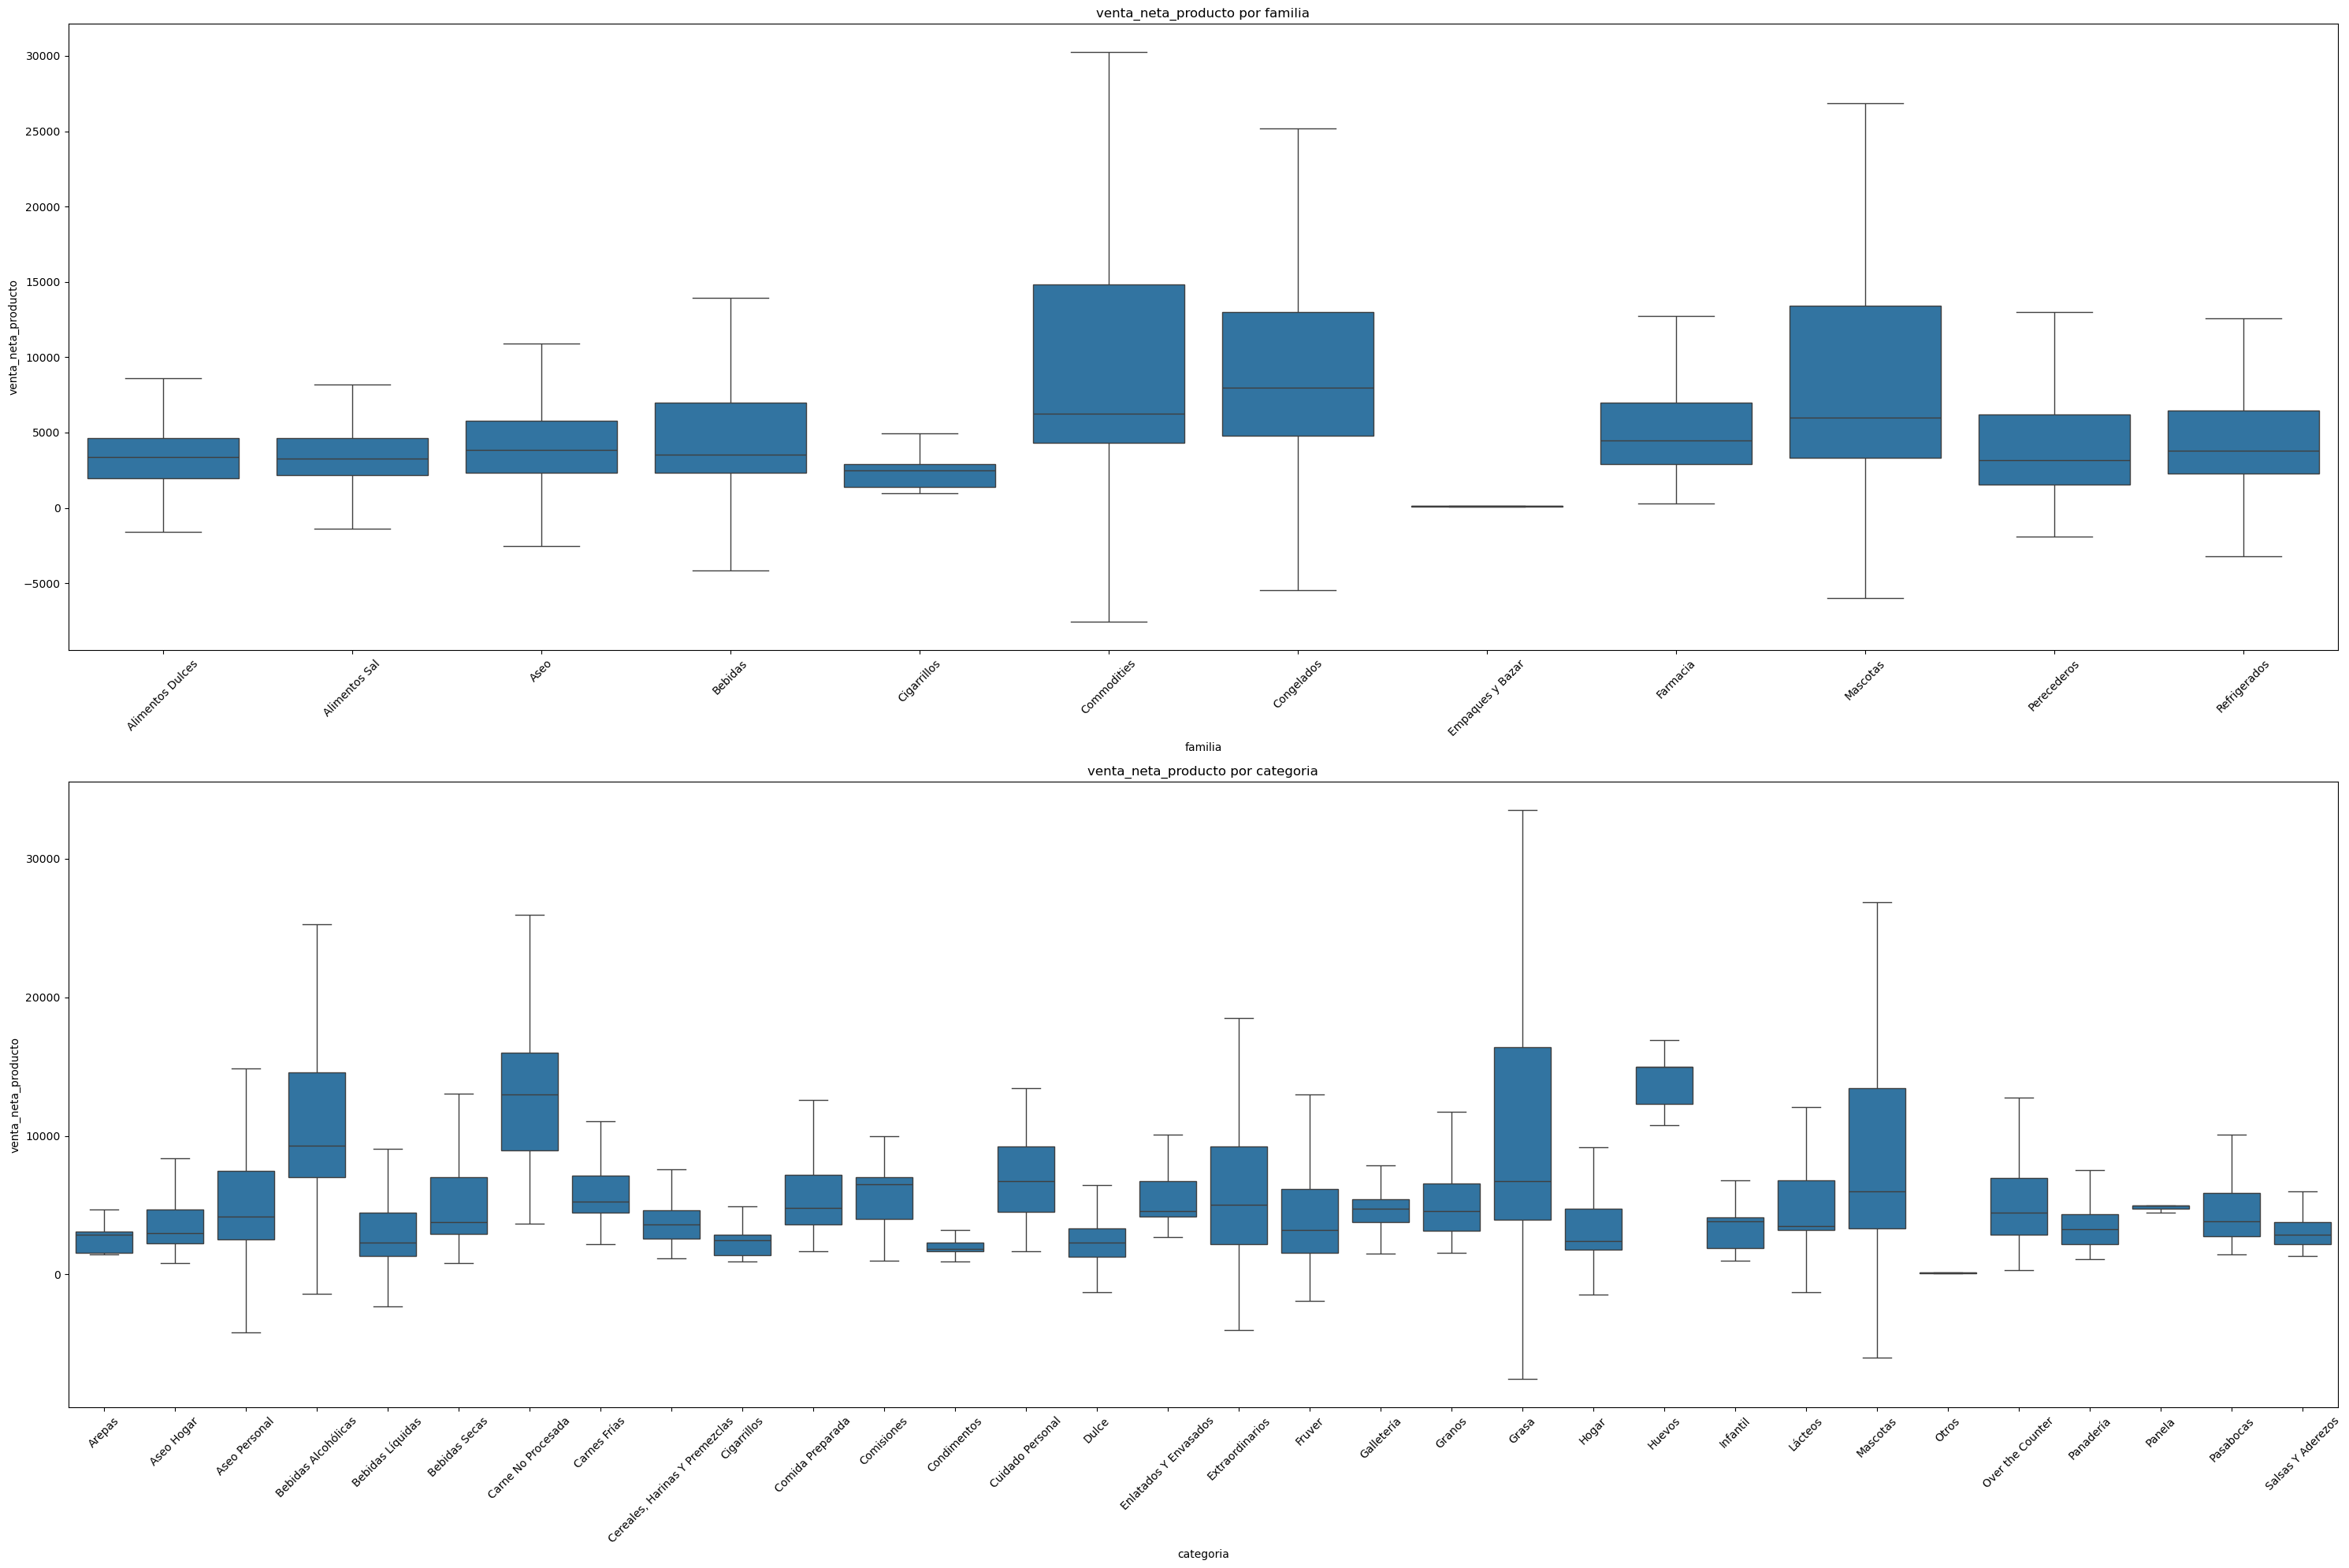

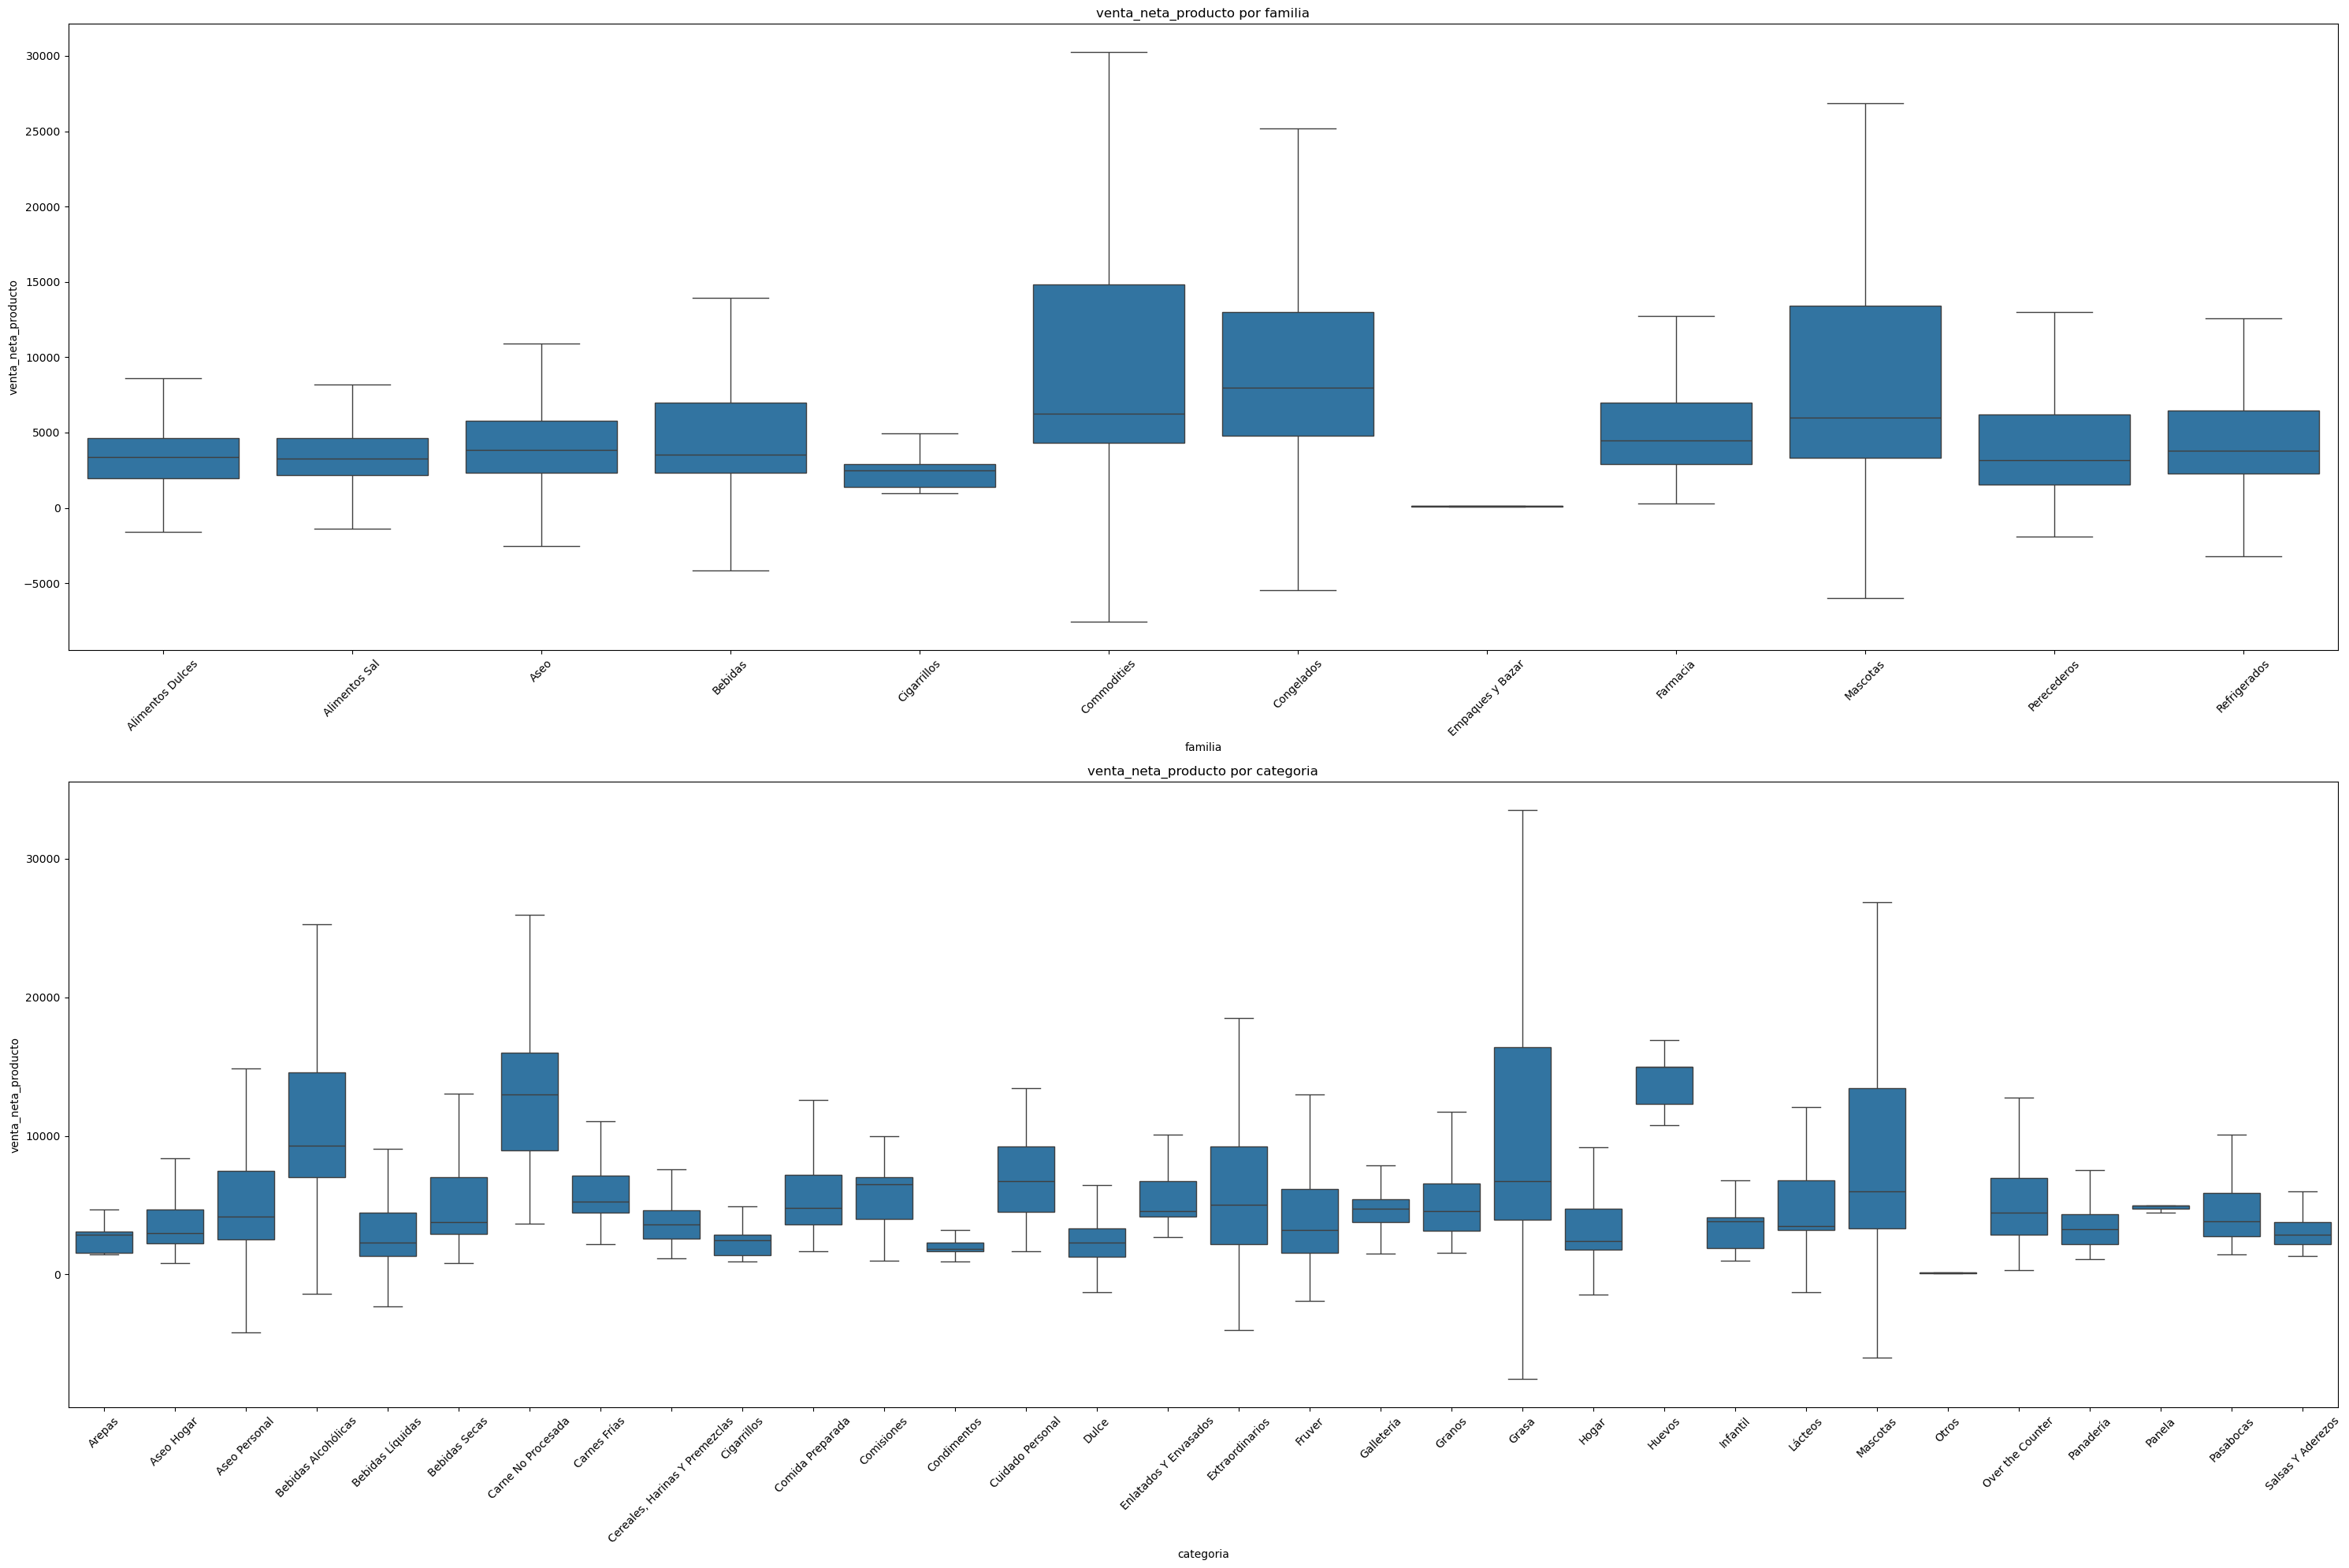

In [20]:
vdf.box_grouped(data,'venta_neta_producto',['familia','categoria'],c=1,cs=30,rs=10)

In [21]:
vdf.contingencia(data,'familia',3000)

familia,Alimentos Dulces,Alimentos Sal,Aseo,Bebidas,Empaques y Bazar,Refrigerados
familia,,,,,,
Alimentos Dulces,NaN,4702.0,5711.0,4528.0,NaN,3496.0
Alimentos Sal,4702.0,NaN,5900.0,4842.0,NaN,3800.0
Aseo,5711.0,5900.0,NaN,5341.0,3988.0,4075.0
Bebidas,4528.0,4842.0,5341.0,NaN,NaN,3218.0
Empaques y Bazar,NaN,NaN,3988.0,NaN,NaN,NaN
Refrigerados,3496.0,3800.0,4075.0,3218.0,NaN,NaN


In [22]:
vdf.contingencia(data,'categoria',2000)

categoria,Aseo Hogar,Aseo Personal,Dulce,Hogar,Lácteos,Otros
categoria,,,,,,
Aseo Hogar,NaN,6612.0,NaN,2853.0,2912.0,2576.0
Aseo Personal,6612.0,NaN,2056.0,2976.0,3316.0,2768.0
Dulce,NaN,2056.0,NaN,NaN,NaN,NaN
Hogar,2853.0,2976.0,NaN,NaN,NaN,NaN
Lácteos,2912.0,3316.0,NaN,NaN,NaN,NaN
Otros,2576.0,2768.0,NaN,NaN,NaN,NaN


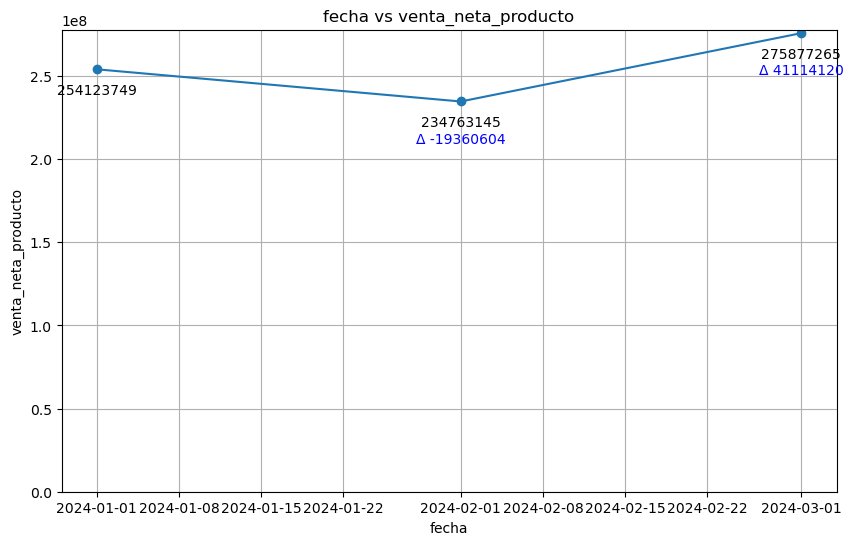

In [23]:
vdf.linea(data,'fecha','venta_neta_producto',15000000,25000000)

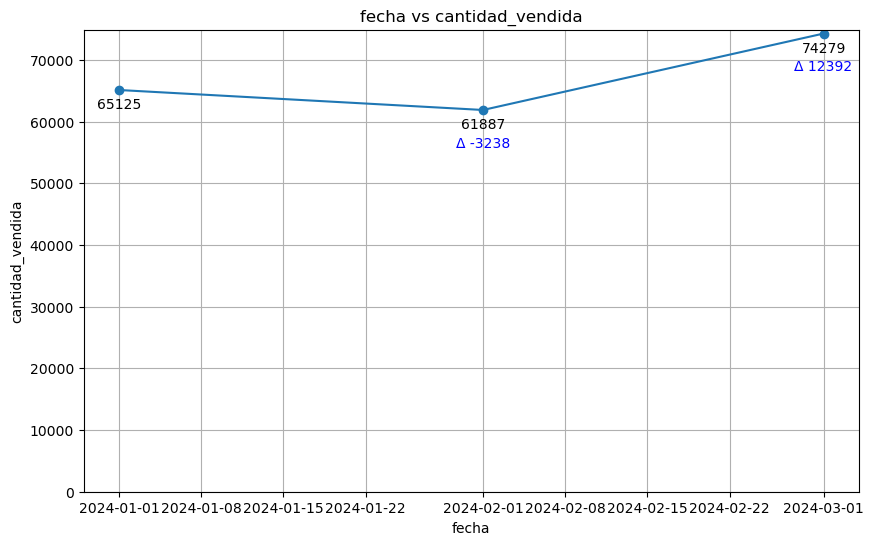

In [24]:
vdf.linea(data,'fecha','cantidad_vendida',3000,6000)

In [25]:
import pandas as pd
import string

def generar_etiquetas_consecutivas(n):
    """
    Genera etiquetas consecutivas en el formato A, B, ..., Z, A1, B1, ..., Z1, A2, B2, ..., etc.
    
    :param n: Número total de etiquetas a generar.
    :return: Lista de etiquetas.
    """
    etiquetas = []
    letras = list(string.ascii_uppercase)
    
    for i in range(n):
        if i < 26:
            etiquetas.append(letras[i])
        else:
            ciclo = i // 26
            indice = i % 26
            etiquetas.append(f"{letras[indice]}{ciclo}")
    
    return etiquetas


In [26]:
n_productos = data['codigo_producto'].nunique()

# Generar etiquetas
etiquetas = ltd.generar_etiquetas_consecutivas(n_productos)

# Crear un diccionario para mapear los productos originales a las nuevas etiquetas
mapa_productos = dict(zip(data['codigo_producto'].unique(), etiquetas))

# Renombrar los productos en la columna 'producto'
data['codigo_producto'] = data['codigo_producto'].map(mapa_productos)

In [27]:
data

,fecha,codigo_factura,mnt_total_a_pagar,cant_items,familia,categoria,subcategoria,codigo_producto,cantidad_vendida,venta_bruta_producto,venta_neta_producto
0,2024-01-01,2347409568,9470.0,5,Refrigerados,Comida Preparada,Ready To Eat,A,1.0,4390.0,3689.0
1,2024-01-01,2347409568,9470.0,5,Alimentos Dulces,Dulce,Típicos,B,1.0,1950.0,1950.0
2,2024-01-01,2347409568,9470.0,5,Empaques y Bazar,Otros,Empaques,C,1.0,190.0,104.0
3,2024-01-01,2347409568,9470.0,5,Alimentos Sal,Pasabocas,Familiar,D,1.0,1850.0,1762.0
4,2024-01-01,2347409568,9470.0,5,Alimentos Dulces,Dulce,Otros,E,1.0,1090.0,916.0
...,...,...,...,...,...,...,...,...,...,...,...
152776,2024-03-01,2542191348,103760.0,21,Aseo,Hogar,Cuidado Del Aire,S23,1.0,5990.0,5034.0
152777,2024-03-01,2542191348,103760.0,21,Alimentos Sal,Enlatados Y Envasados,Mar,X1,2.0,9900.0,8319.0
152778,2024-03-01,2527515632,12970.0,3,Aseo,Aseo Personal,Femenina,Y14,1.0,8590.0,8590.0
152779,2024-03-01,2527515632,12970.0,3,Aseo,Aseo Personal,Femenina,X11,1.0,3290.0,3290.0


Figura guardada en ../reports/figures/Diagrama de Pareto. Venta neta por Familia de producto.png


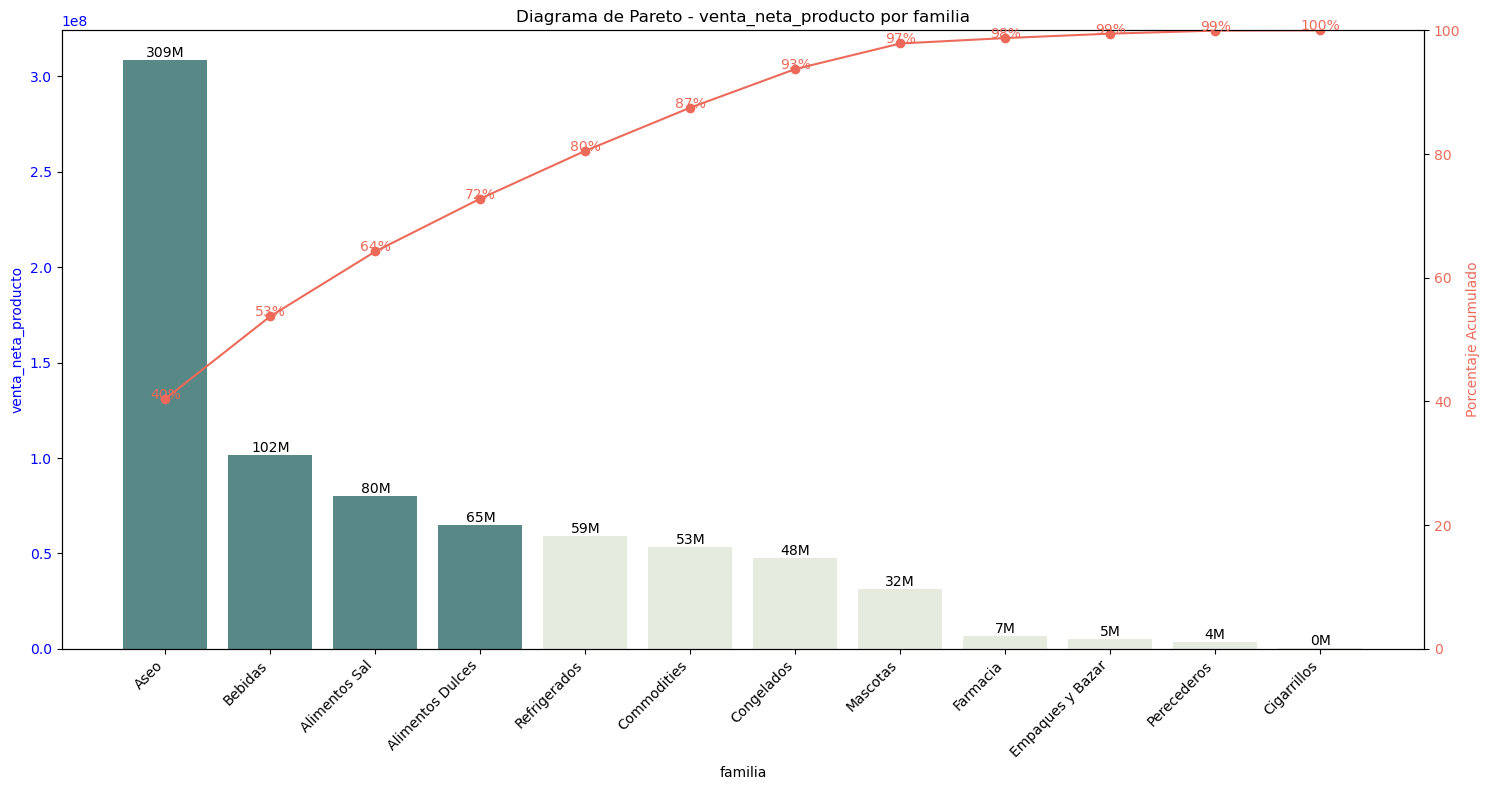

In [29]:
fig= vdf.pareto1(data,'familia','venta_neta_producto', corte=80, r=8, escala='M')
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por Familia de producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

Figura guardada en ../reports/figures/Diagrama de Pareto. Venta neta por Categoria de producto.png


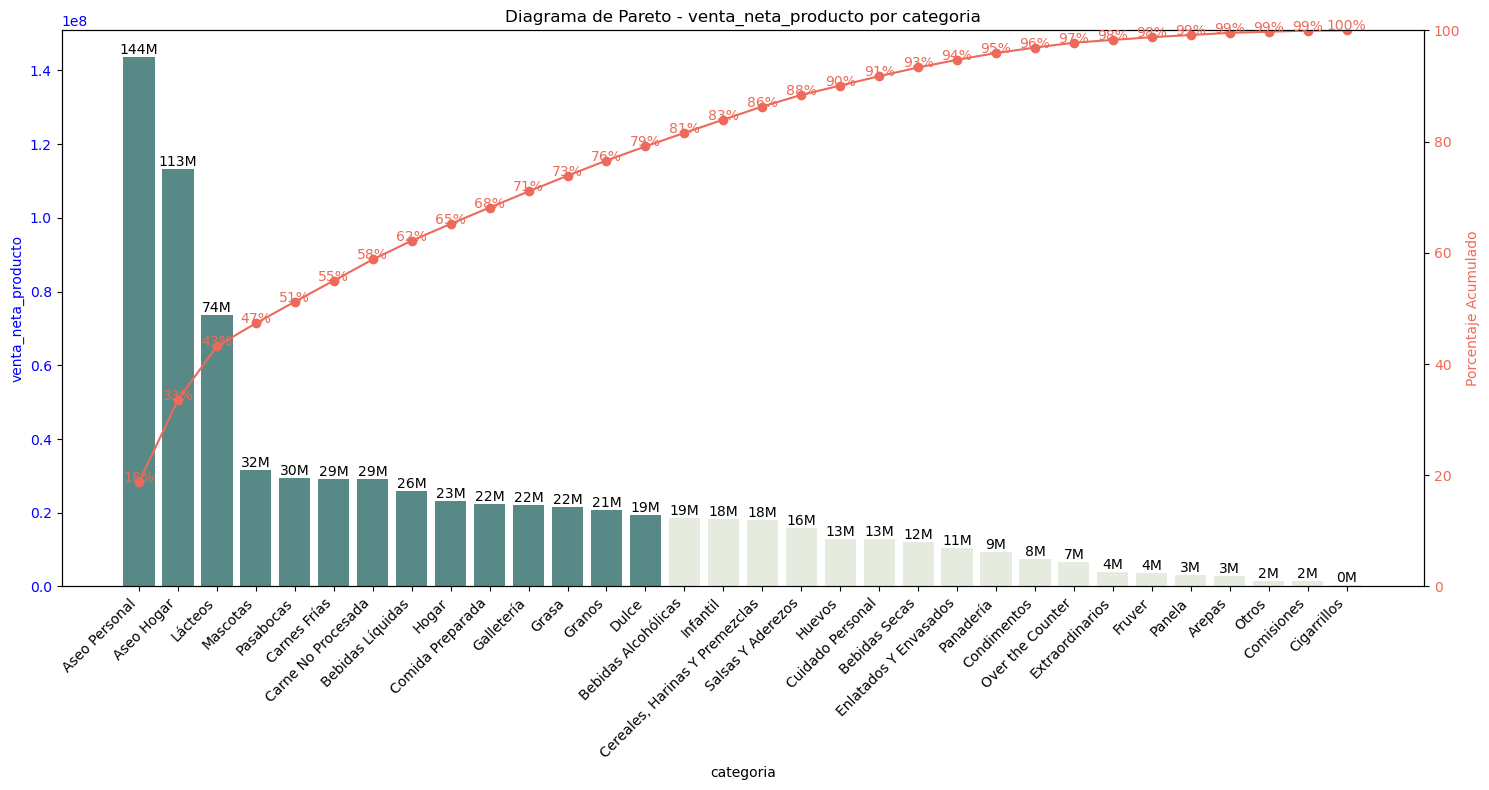

In [31]:
fig= vdf.pareto1(data,'categoria','venta_neta_producto', corte=80, r=8, escala='M')
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por Categoria de producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

Figura guardada en ../reports/figures/Diagrama de Pareto. Venta neta por producto.png


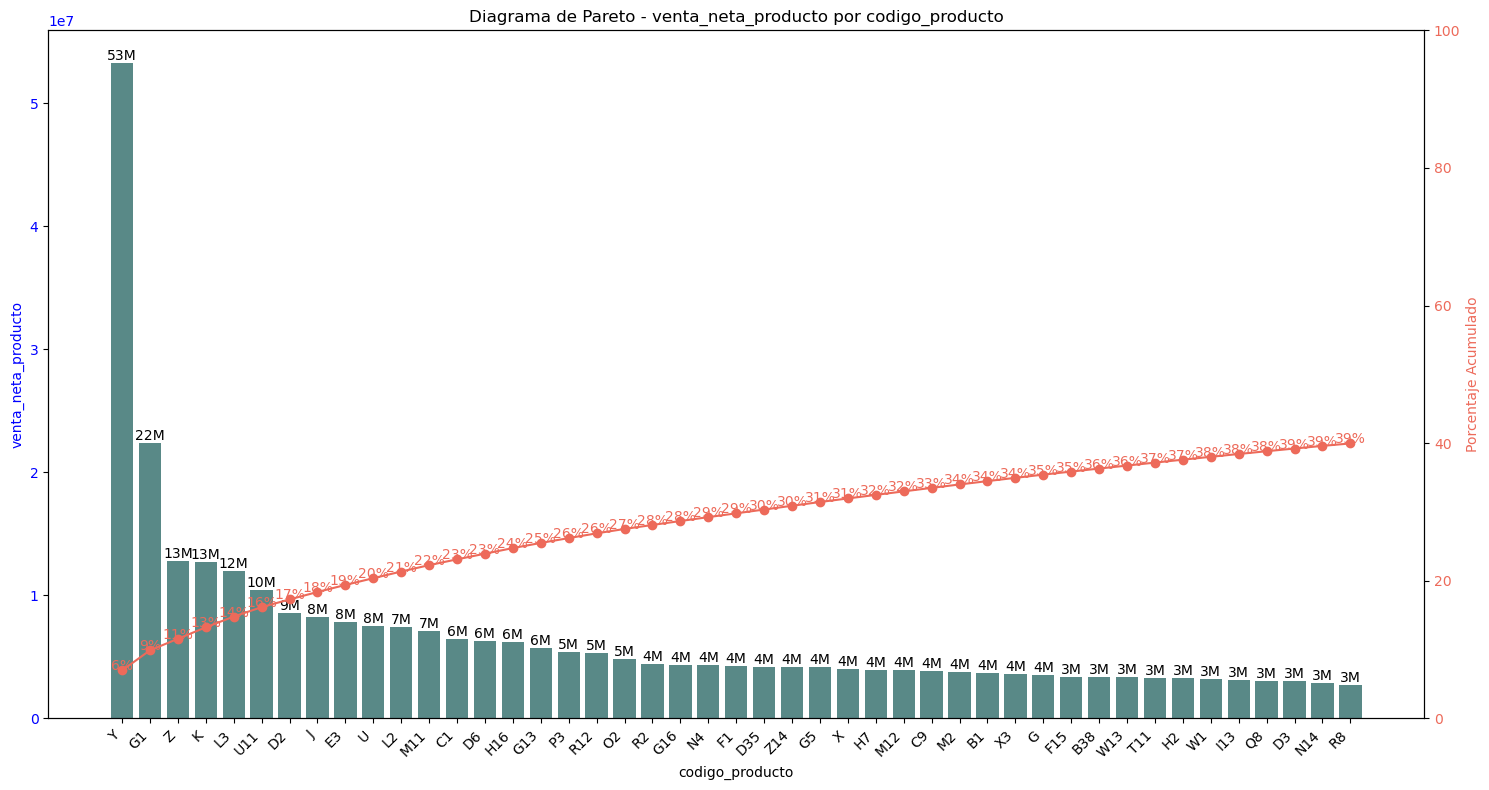

In [32]:
fig= vdf.pareto1(data,'codigo_producto','venta_neta_producto', t=40, corte=80, r=8, escala='M')
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

Figura guardada en ../reports/figures/Diagrama de Pareto. Venta neta por Subcategoria de producto.png


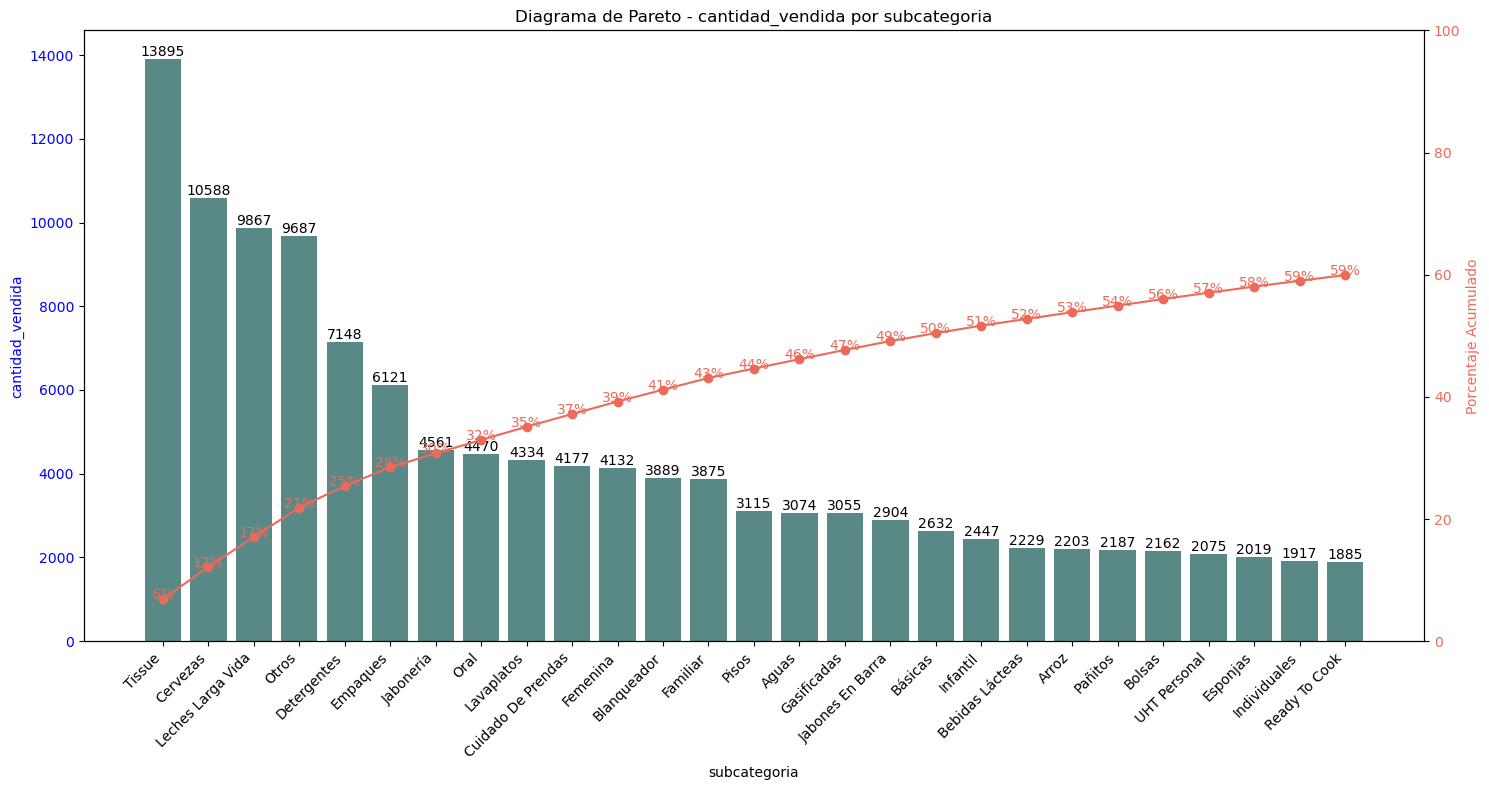

In [39]:
fig= vdf.pareto1(data,'subcategoria','cantidad_vendida', t=60, corte=80, r=8, )
# Guardar la figura en un archivo
nameFile = 'Diagrama de Pareto. Venta neta por Subcategoria de producto.png'
vdf.guardar_grafico(fig, f'../reports/figures/{nameFile}')

In [34]:
# Outliers variable: mnt_total_a_pagar
vdf.outliers(data,'mnt_total_a_pagar')

,mnt_total_a_pagar
codigo_factura,
2373669473,172440.0
2331389763,167560.0
2358482212,243570.0
2395905322,229700.0
2341166416,149640.0
...,...
2489797001,200630.0
2542172366,203720.0
2506979081,151800.0


Histogramas de las variables numericas del dataset:


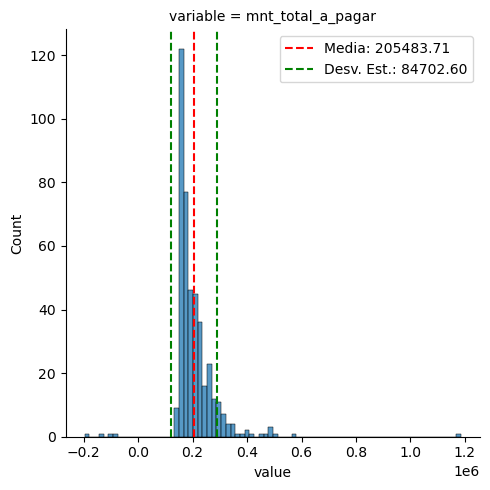

In [35]:
vdf.histog_mean_desv(vdf.outliers(data,'mnt_total_a_pagar'),1)

In [36]:
# Outliers variable: cantidad_items
# Outliers variable: mnt_total_a_pagar
vdf.outliers(data,'cant_items')

,cant_items
codigo_factura,
2346743027,212


In [43]:
# Dividir el dataframe para poder agruparlo

# Generar un número aleatorio de 20 dígitos
numero_aleatorio = random.randint(10**19, 10**20 - 1)

# Guardar el DataFrame como un archivo CSV usando el número aleatorio como nombre
nombre_archivo = f"../data/temp/chunks/{numero_aleatorio}.csv"
#data.to_csv(nombre_archivo, index=False)

# Guardar DataFrame por partes en archivos CSV
data.to_csv(nombre_archivo, index=False, chunksize=10**6)

# Leer y procesar los chunks uno por uno
chunks = []
for chunk in pd.read_csv(nombre_archivo, chunksize=10**5):
    grouped_chunk = chunk.groupby(['fecha', 'codigo_factura', 'codigo_producto', 'familia', 'categoria', 'subcategoria'])['cantidad_vendida'].sum().reset_index()
    chunks.append(grouped_chunk)

# Combinar los resultados
df_agrupado = pd.concat(chunks).groupby(['fecha', 'codigo_factura', 'codigo_producto', 'familia', 'categoria', 'subcategoria'])['cantidad_vendida'].sum().reset_index()

print(df_agrupado.shape)

data_filtrada = df_agrupado[df_agrupado['cantidad_vendida'] != 0]
print(data_filtrada.shape)